<a href="https://colab.research.google.com/github/maqbuul/college/blob/main/Implementation_of_classification%26regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



In [ ]:
df = pd.read_csv('/content/Sales_data - Sales_data.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') #converting the data type of 'Order Date' column to date time format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y') #converting the data type of 'Ship Date' column to date time format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [ ]:
print('Order Date Description\n')
print(df['Order Date'].describe()) #Displays the distribution of dates in 'Order Data' column
print('\nShip Date Description\n')
print(df['Ship Date'].describe()) #Displays the distribution of dates in 'Ship Data' column

Order Date Description

count                    9800
unique                   1230
top       2017-09-05 00:00:00
freq                       38
first     2015-01-03 00:00:00
last      2018-12-30 00:00:00
Name: Order Date, dtype: object

Ship Date Description

count                    9800
unique                   1326
top       2018-09-26 00:00:00
freq                       34
first     2015-01-07 00:00:00
last      2019-01-05 00:00:00
Name: Ship Date, dtype: object


<ipython-input-6-5b8a109eacca>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df['Order Date'].describe()) #Displays the distribution of dates in 'Order Data' column
<ipython-input-6-5b8a109eacca>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df['Ship Date'].describe()) #Displays the distribution of dates in 'Ship Data' column


In [ ]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True) #Sorting data by  ascending order of the coloumn values 'Order Date'
df.set_index("Order Date", inplace = True) #Setting 'Order Date' as index of the dataframe 'df' for ease of Time Series Analysis

In [ ]:
# To forecast sales seven days later of the order date, let us create a new dataframe with only the target column i.e,
# the 'Sales' column and 'Order Date' as the index

new_data = pd.DataFrame(df['Sales'])
new_data

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
...,...
2018-12-30,20.720
2018-12-30,323.136
2018-12-30,209.300


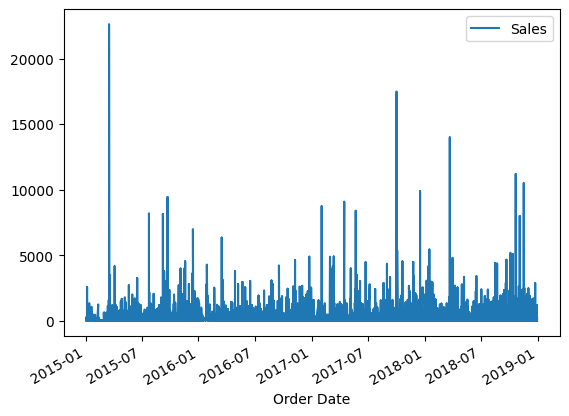

In [ ]:
#Plotting the data to understand the sales distribution from the year 2015-2018
new_data.plot();


In [ ]:
# # Checkting for Stationarity
new_data =  pd.DataFrame(new_data['Sales'].resample('D').mean())
new_data = new_data.interpolate(method='linear') #The interpolate() function is used to interpolate values according to
#different methods. It ignore the index and treats the values as equally spaced.

In [ ]:
# Method 1
# To check for stationarity by comparing the change in mean and variance over time, let us split the data into train, test and validate.
train, test, validate = np.split(new_data['Sales'].sample(frac=1), [int(.6*len(new_data['Sales'])),int(.8*len(new_data['Sales']))])

In [ ]:
print('Train Dataset')
print(train)
print('Test Dataset')
print(test)
print('Validate Dataset')
print(validate)

Train Dataset
Order Date
2015-03-02     23.880000
2015-09-25     70.977760
2018-04-21    156.820500
2016-02-02     65.788444
2018-03-21    277.719667
                 ...    
2015-03-20    229.007104
2017-11-21     98.074250
2017-09-06    164.192000
2016-11-15     87.771250
2016-08-22     33.316000
Name: Sales, Length: 874, dtype: float64
Test Dataset
Order Date
2016-01-10    1018.104000
2018-12-29     242.961167
2017-05-29     212.637000
2015-02-28     119.885550
2017-01-06      56.580000
                 ...     
2018-09-14     204.200176
2018-04-01     497.749000
2017-11-03     158.449833
2017-05-27     757.868286
2017-01-09     247.682000
Name: Sales, Length: 292, dtype: float64
Validate Dataset
Order Date
2018-12-18    182.295550
2016-01-31     33.086667
2015-10-22    111.904000
2015-04-09    257.482434
2015-06-30     92.453000
                 ...    
2015-07-11    224.706222
2015-11-16    135.592850
2015-10-26    223.940000
2016-10-14    294.137125
2018-03-07     55.530000
Name:

In [ ]:
mean1, mean2, mean3 = train.mean(), test.mean(), validate.mean() #taking mean of train, test and validate data
var1, var2, var3 = train.var(), test.var(), validate.var() #taking variance of train, test and validate data

print('Mean:')
print(mean1, mean2, mean3)
print('Variance:')
print(var1, var2, var3)

Mean:
214.14711552491633 231.54562617859403 238.59023342561102
Variance:
66427.59148466629 92148.7933801278 68192.32060636357


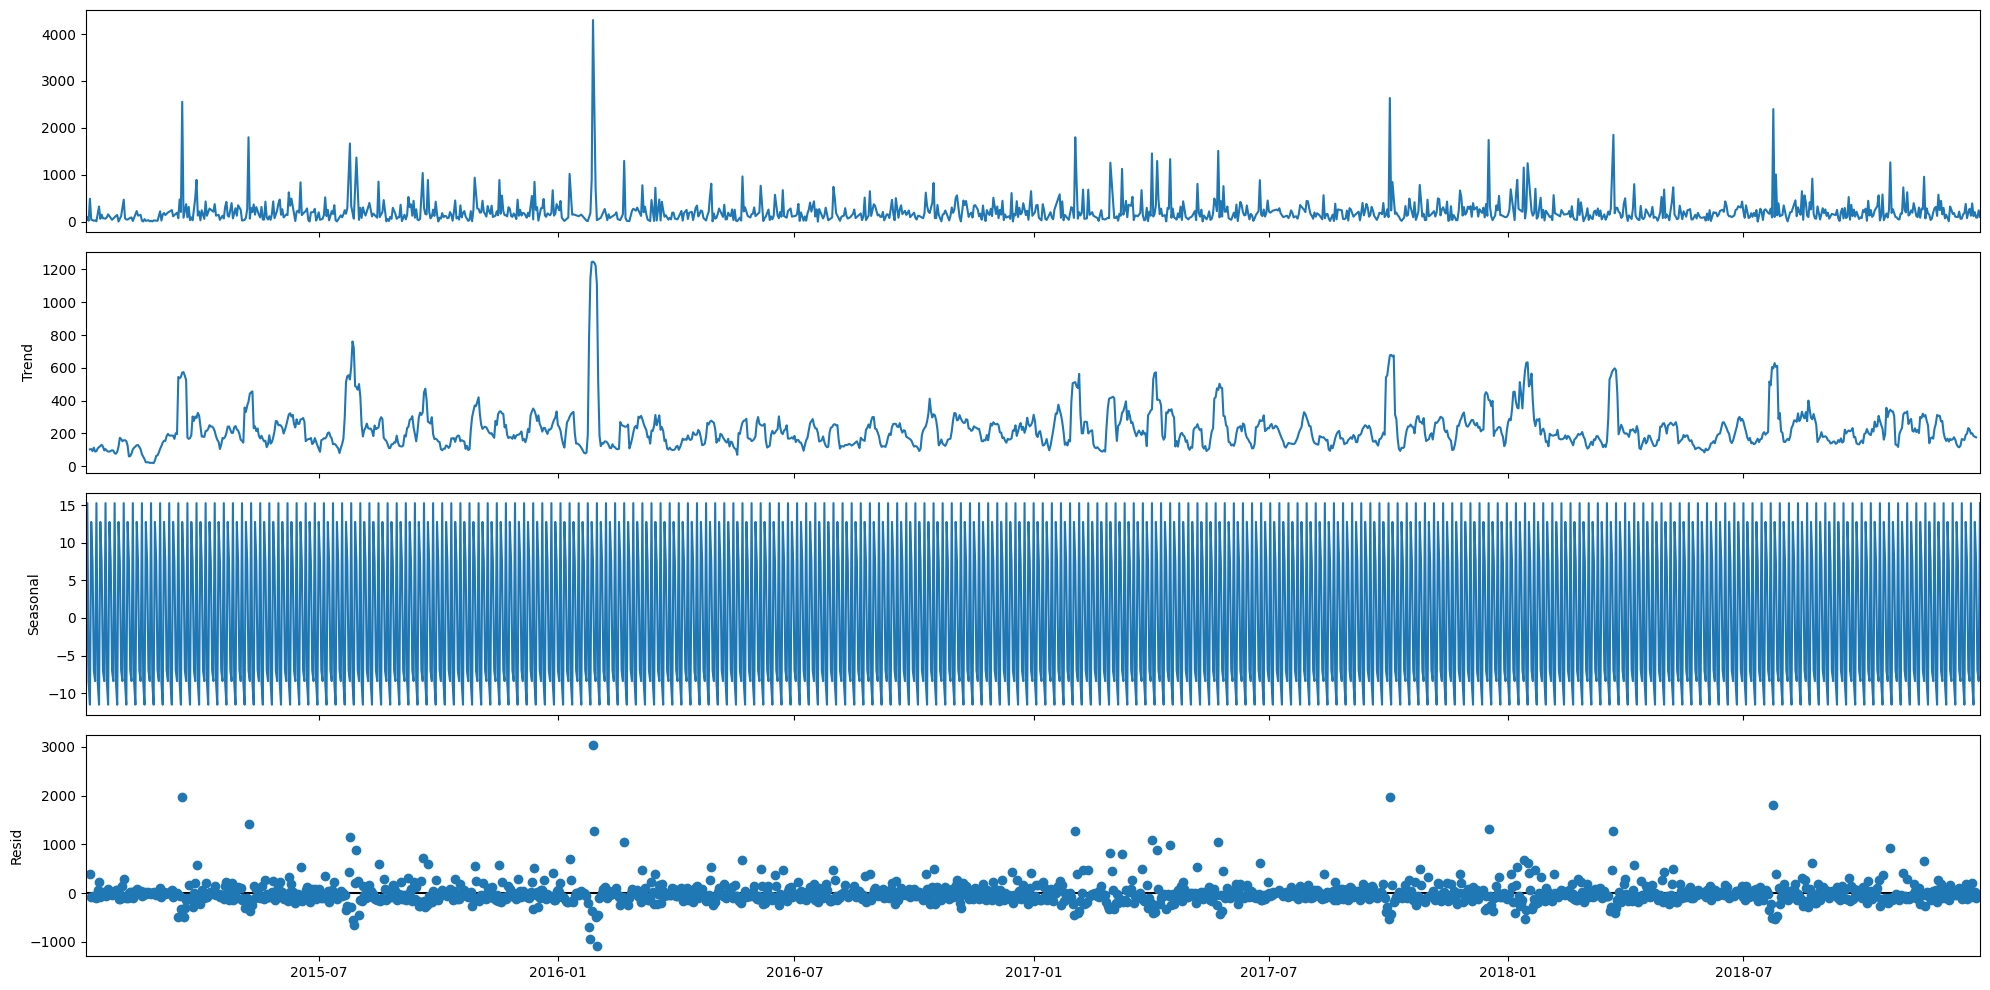

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(new_data, model='additive') #function used to decompose Time Series Data into Trend and Seasonality
fig = decomposition.plot()
plt.show()

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))] #for loop for creating combinations of seasonal parameters of SARIMA
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for parameters in pdq: #for loop for determining the best combination of seasonal parameters for SARIMA
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(new_data,
                                            order=parameters,
                                            seasonal_param_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False) #determines the AIC value of the model**
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        except:
            continue


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:21194.720419683938


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:20882.284066808126
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:20882.284066808126


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:20882.284066808126
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:20882.284066808126


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:20882.284066808126
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:20882.284066808126


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:20882.284066808126
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:20882.284066808126
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:21077.55722633678
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:21077.55722633678


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:21077.55722633678
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:21077.55722633678
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:21077.55722633678
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:21077.55722633678
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:21077.55722633678
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:21077.55722633678


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:20413.118550948617


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:20413.118550948617


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:20413.118550948617


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:20413.118550948617


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:20413.118550948617


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:20413.118550948617


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:20413.118550948617


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:20413.118550948617
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:20706.93152774898
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:20706.93152774898
SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:20706.93152774898
SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:20706.93152774898
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:20706.93152774898
SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:20706.93152774898


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict

SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:20706.93152774898
SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:20706.93152774898


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:20437.301953011098


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:20437.301953011098


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:20437.301953011098


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:20437.301953011098


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:20437.301953011098


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:20437.301953011098


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:20437.301953011098


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:20437.301953011098
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:20795.675610560873
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:20795.675610560873
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:20795.675610560873
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:20795.675610560873
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:20795.675610560873
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:20795.675610560873


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict

SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:20795.675610560873
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:20795.675610560873


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:20377.366491082408


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:20377.366491082408


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:20377.366491082408


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:20377.366491082408


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:20377.366491082408


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:20377.366491082408


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:20377.366491082408


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_param_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:20377.366491082408


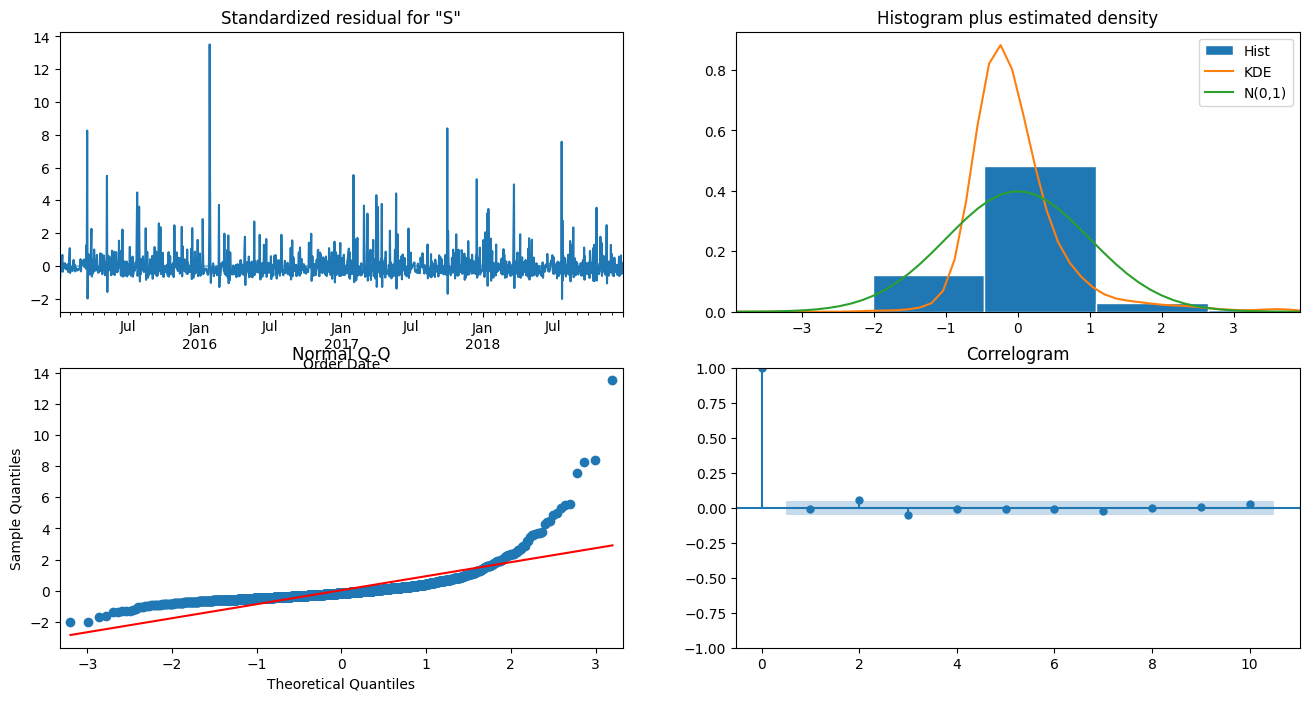

In [ ]:
results.plot_diagnostics(figsize=(16, 8)) #Produces a plot grid of: 1. Standardized residuals over time
# 2. Histogram plus estimated density of standardized residulas and along with a Normal(0,1) density plotted for reference.
# 3. Normal Q-Q plot, with Normal reference line and, 4. Correlogram.
plt.show()

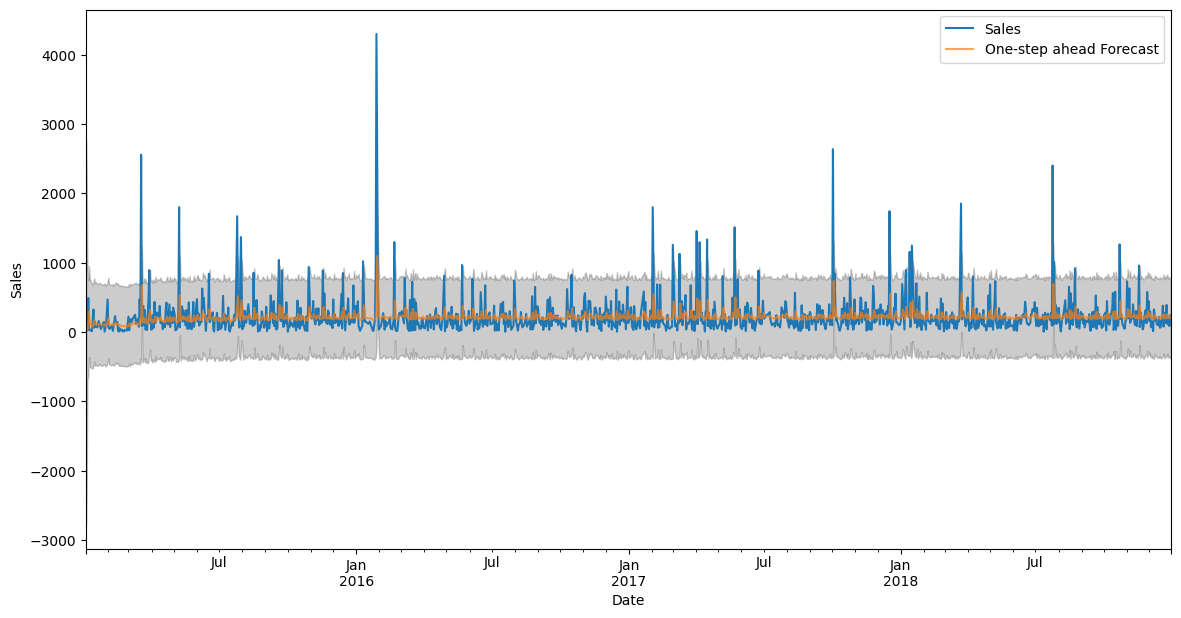

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-03'), dynamic=False) # variable to display plot for predicted values
pred_val = pred.conf_int()
ax = new_data['2014':].plot(label='observed') # displays plot for original values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7)) # displays plot for predicted values
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = new_data['Sales']

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
print('The Mean Squared Error of the forecasts is {}'.format(round(rmse, 2))) # displays the root mean squared error of the forecast with rounding it up to 2 decimals


The Mean Squared Error of the forecasts is 262.42


In [ ]:
forecast = results.forecast(steps=7) # making a forecast of 7 days later of the last date in the 'Order Date' column
print(forecast.astype('int')) #displays the sales forecast as type integer

2018-12-31    197
2019-01-01    217
2019-01-02    221
2019-01-03    222
2019-01-04    223
2019-01-05    223
2019-01-06    223
Freq: D, Name: predicted_mean, dtype: int64


In [ ]:
mae = mean_absolute_error(y_forecasted, y_truth)
mae

143.06037591570444

#Credit card default

In [ ]:
import seaborn as sns
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from pandas import set_option
plt.style.use('ggplot') # nice plots


from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
#print(os.listdir("../input"))

In [ ]:
df = pd.read_csv('/content/credit_card_default_data - credit_card_default_data.csv')

In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
df.columns = df.iloc[0]


In [ ]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')




In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0


In [ ]:
df = df.iloc[1:]

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
data = df

In [ ]:
data.rename(columns={"default payment next month": "Default"}, inplace=True)
data.drop('ID', axis = 1, inplace =True) # drop column "ID"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  float64
 2   EDUCATION  30000 non-null  float64
 3   MARRIAGE   30000 non-null  float64
 4   AGE        30000 non-null  float64
 5   PAY_0      30000 non-null  float64
 6   PAY_2      30000 non-null  float64
 7   PAY_3      30000 non-null  float64
 8   PAY_4      30000 non-null  float64
 9   PAY_5      30000 non-null  float64
 10  PAY_6      30000 non-null  float64
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [ ]:
y = data.Default     # target default=1 or non-default=0
features = data.drop('Default', axis = 1, inplace = False)

In [ ]:
data['EDUCATION'].unique()

array([2., 1., 3., 5., 4., 6., 0.])

In [ ]:
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])

Similarly, the column 'marriage' should have three categories: 1 = married, 2 = single, 3 = others but it contains a category '0' which will be joined to the category '3'.

In [ ]:
data['MARRIAGE'].unique()

array([1., 2., 3., 0.])

In [ ]:
data['MARRIAGE']=np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])
data['MARRIAGE'].unique()

array([1., 2., 3.])

Mapping the target: categorizing
From this sample of 30,000 credit card holders, there were 6,636 default credit cards; that is, the proportion of default in the data is 22,1%.

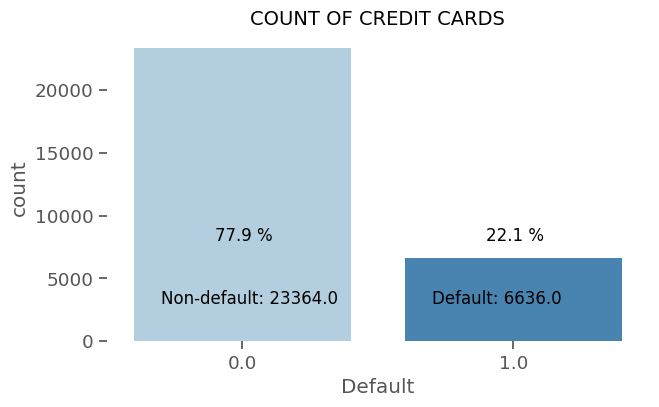

In [ ]:
yes = data.Default.sum()
no = len(data)-yes

# Percentage
yes_perc = round(yes/len(data)*100, 1)
no_perc = round(no/len(data)*100, 1)

import sys
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot(x='Default',data=data, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);


In [ ]:
# Original dataset
X = data.drop('Default', axis=1)
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Setup the hyperparameter grid, (not scaled data)
param_grid = {'C': np.logspace(-5, 8, 15)}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Tuned Logistic Regression Parameters: {'C': 8.483428982440725e-05}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7786666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      4673
         1.0       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000


Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0001


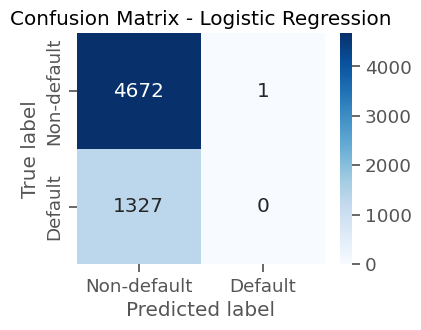

In [ ]:
LR = LogisticRegression(C=0.00005, random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation
cv_scores =cross_val_score(LR, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

In [ ]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 2, 'max_features': 9, 'max_depth': 7, 'criterion': 'gini'}


Accuracy: 0.808

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      4673
         1.0       0.63      0.33      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.66      6000
weighted avg       0.79      0.81      0.78      6000


Average 5-Fold CV Score: 0.8121 , Standard deviation: 0.0085


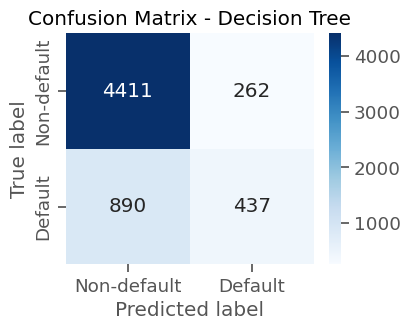

In [ ]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7,
                                     max_features= 9, min_samples_leaf= 2,
                                     random_state=0)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation
cv_scores =cross_val_score(Tree, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");


## Online News Popularity data (Regression)

In [ ]:
df = pd.read_csv("/content/Online_news_popularity_data - Online_news_popularity_data.csv")

In [ ]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9420 entries, 0 to 9419
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            9420 non-null   object 
 1   timedelta                      9420 non-null   int64  
 2   n_tokens_title                 9420 non-null   int64  
 3   n_tokens_content               9420 non-null   int64  
 4   n_unique_tokens                9420 non-null   float64
 5   n_non_stop_words               9420 non-null   float64
 6   n_non_stop_unique_tokens       9420 non-null   float64
 7   num_hrefs                      9420 non-null   int64  
 8   num_self_hrefs                 9420 non-null   int64  
 9   num_imgs                       9420 non-null   int64  
 10  num_videos                     9420 non-null   int64  
 11  average_token_length           9420 non-null   float64
 12  num_keywords                   9420 non-null   i

In [ ]:
# removing duplicates
df=df.drop_duplicates()

In [ ]:
n=df.isna().sum()
n[n>0]

max_positive_polarity           1
avg_negative_polarity           1
min_negative_polarity           1
max_negative_polarity           1
title_subjectivity              1
title_sentiment_polarity        1
abs_title_subjectivity          1
abs_title_sentiment_polarity    1
shares                          1
dtype: int64

In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,9420.000000,9420.000000,9420.000000,9420.000000,9420.000000,9420.000000,9420.000000,9420.000000,9420.000000,9420.000000,...,9420.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000
mean,645.009130,9.756369,483.256157,0.561504,0.992144,0.704535,9.767941,3.261996,3.519002,1.212739,...,0.098842,0.765496,-0.253770,-0.485898,-0.113152,0.270828,0.081196,0.349376,0.151605,3291.516722
std,52.097026,1.959400,403.272817,0.119507,0.088288,0.121975,10.040267,4.356321,7.643726,4.408387,...,0.071544,0.226071,0.125813,0.276260,0.097843,0.323318,0.259959,0.187039,0.226243,14562.669224
min,553.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,600.000000,8.000000,222.000000,0.488395,1.000000,0.643140,4.000000,1.000000,0.000000,0.000000,...,0.050000,0.600000,-0.322222,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,989.000000
50%,647.000000,10.000000,355.000000,0.561063,1.000000,0.710091,7.000000,2.000000,1.000000,0.000000,...,0.100000,0.800000,-0.247222,-0.500000,-0.100000,0.100000,0.000000,0.500000,0.000000,1500.000000
75%,692.000000,11.000000,623.000000,0.634783,1.000000,0.777401,12.000000,4.000000,1.000000,1.000000,...,0.100000,1.000000,-0.179167,-0.291667,-0.050000,0.500000,0.150000,0.500000,0.250000,2900.000000
max,731.000000,18.000000,4979.000000,1.000000,1.000000,1.000000,171.000000,74.000000,99.000000,75.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [ ]:
df.dtypes

url                              object
timedelta                         int64
n_tokens_title                    int64
n_tokens_content                  int64
n_unique_tokens                 float64
                                 ...   
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
shares                          float64
Length: 61, dtype: object

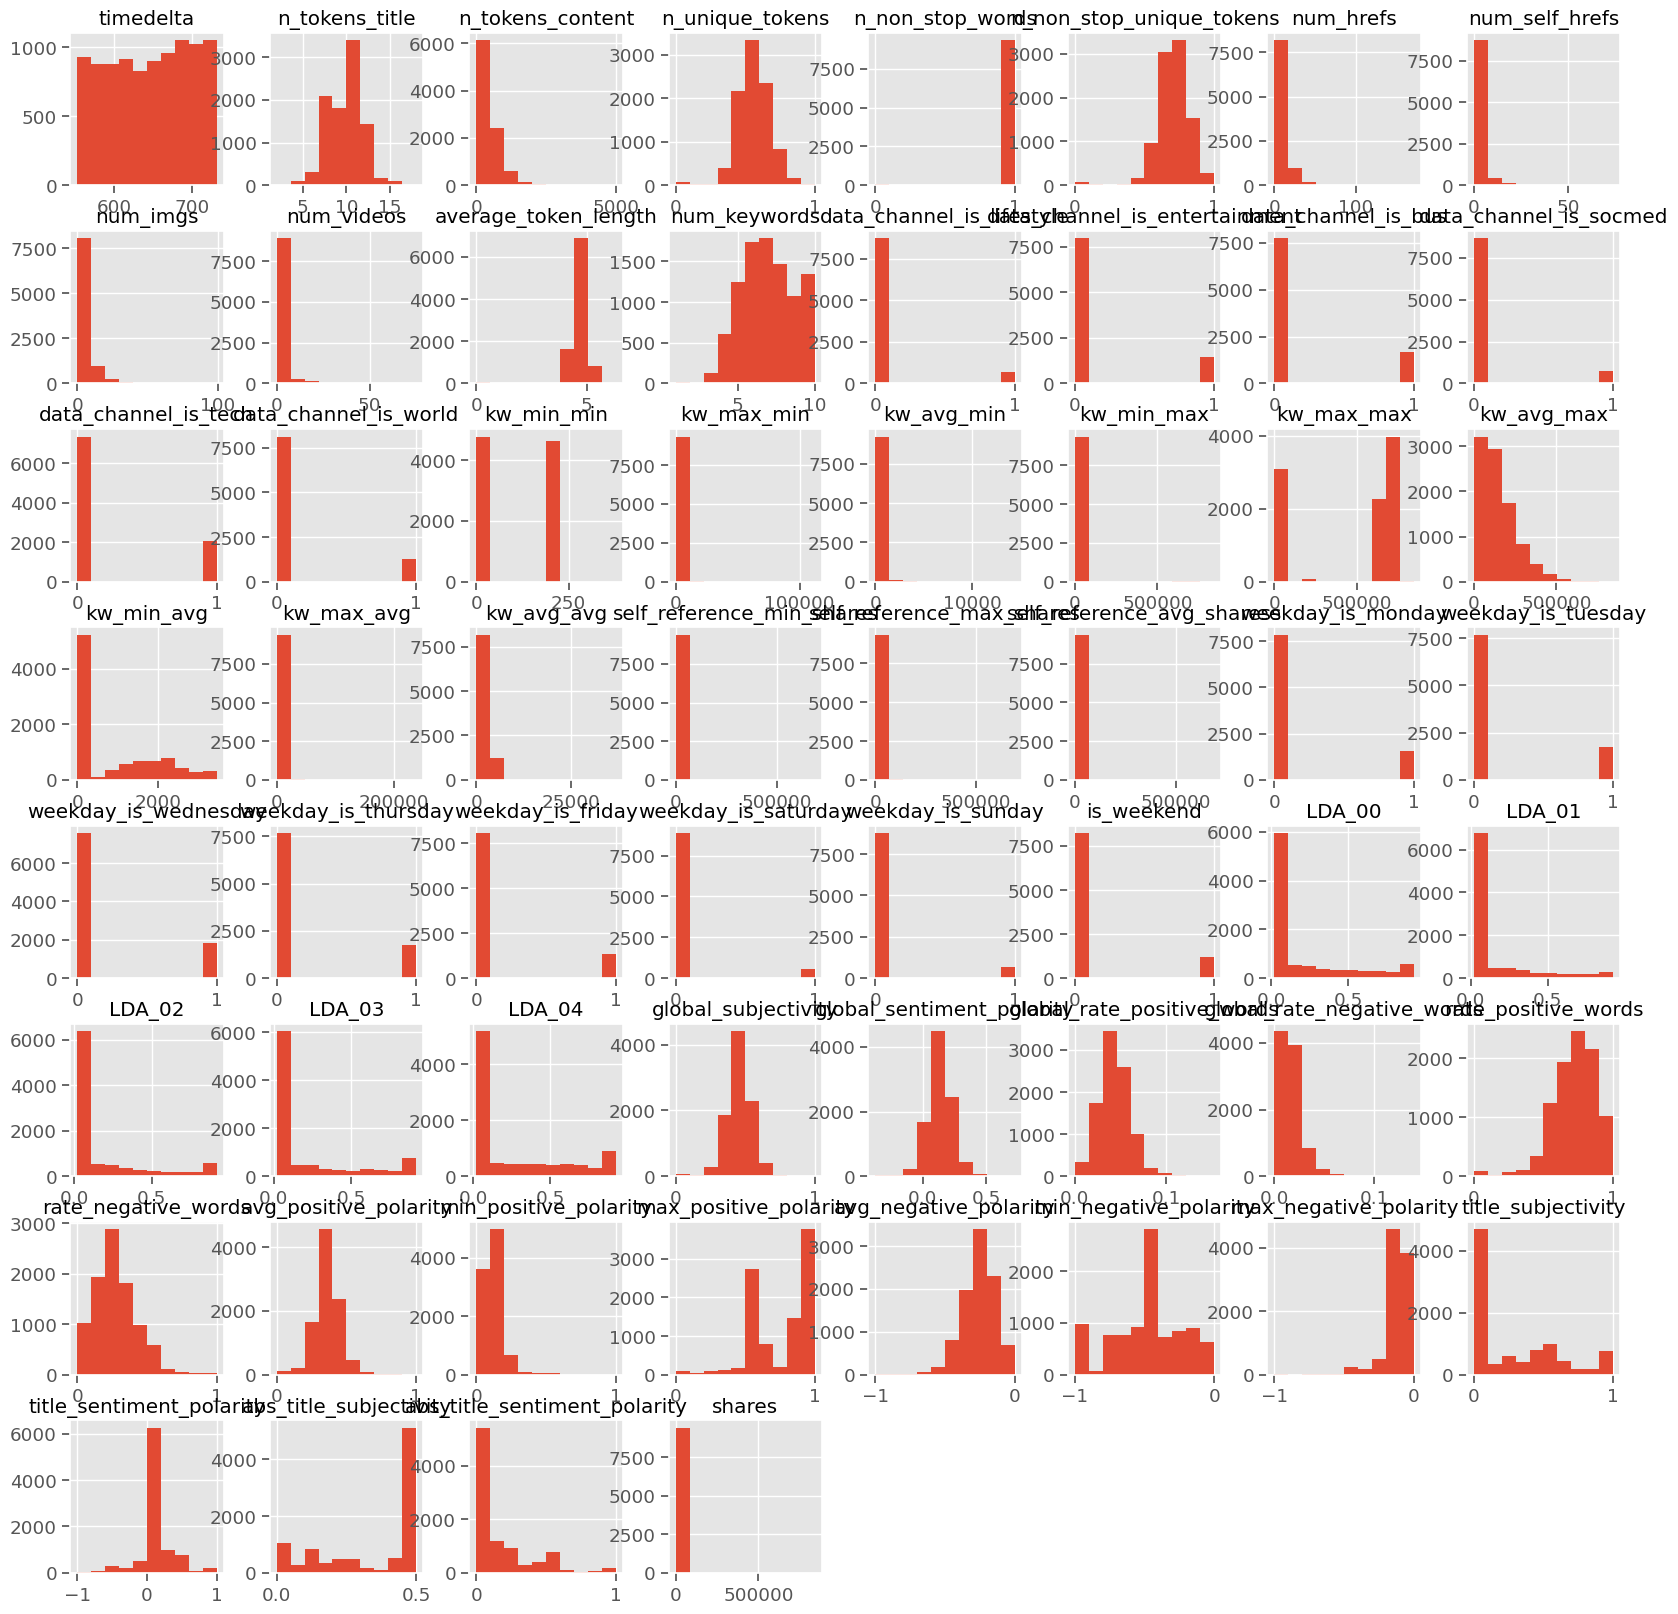

In [ ]:
df.hist(figsize=(20,20))
plt.show()

In [ ]:
df.columns=df.columns.str.replace(" ","")

In [ ]:
num_of_nowords=df[df['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 74


In [ ]:
# Drop these items or rows with n_tokens_content = 0

df = df[df['n_tokens_content'] != 0]

In [ ]:
df = df.drop('url',axis=1)
df = df.drop('timedelta',axis=1)
df= df.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [ ]:
#Understanding target variable distribution
df['shares'].describe()

count      9345.000000
mean       3289.971750
std       14616.766055
min          41.000000
25%         989.000000
50%        1500.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [ ]:
df['shares'].median()

1500.0

In [ ]:
# Create a new target variable
df['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

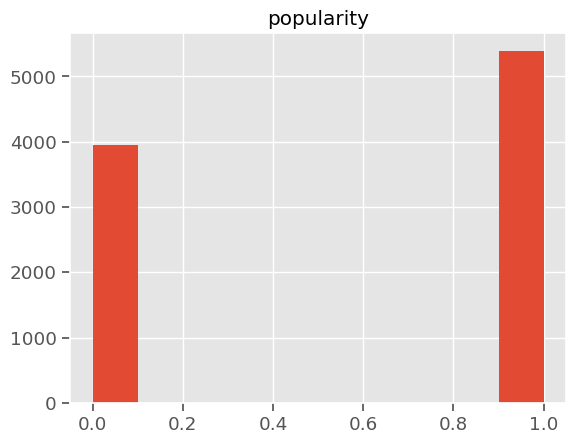

In [ ]:
df.hist(column='popularity');

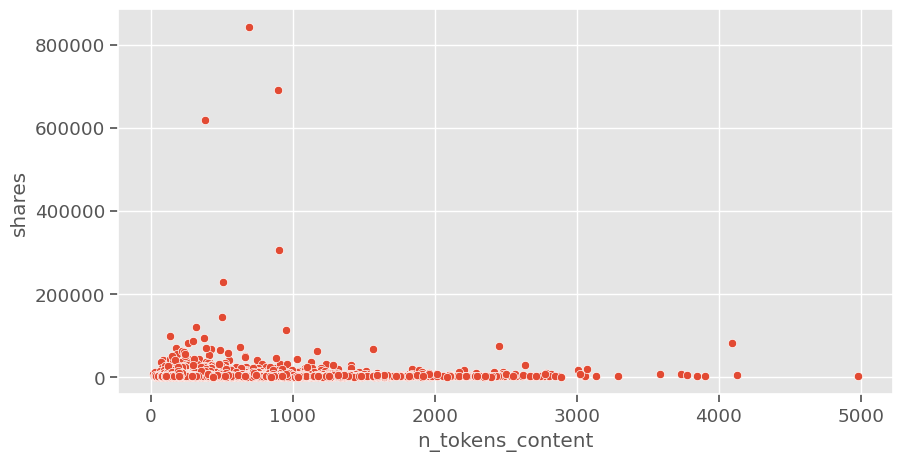

In [ ]:
# Number of words in content vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=df)

<ipython-input-108-b8164ebc0b1a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(y='shares', x='n_tokens_title', data=df,palette='muted');


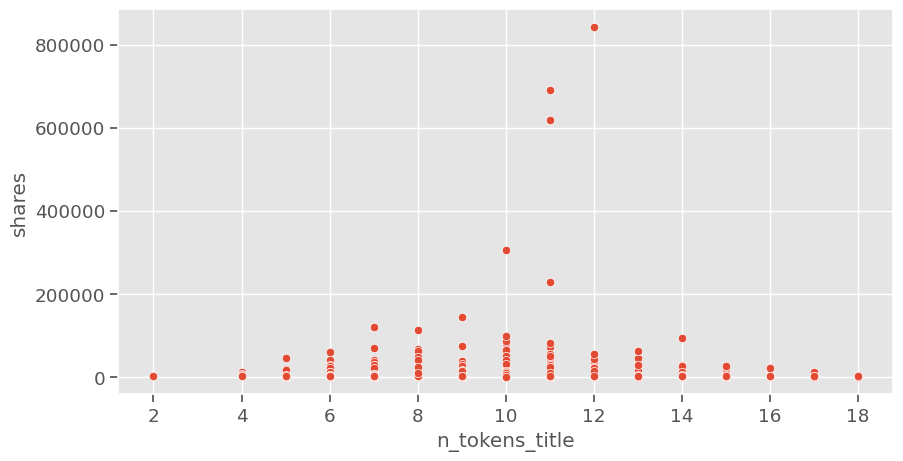

In [ ]:
# Number of words in title vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_title', data=df,palette='muted');

In [ ]:
a,b = df['shares'].mean(),df['shares'].median()

In [ ]:
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 3289.971749598716
Median article share = 1500.0


In [ ]:
Wday = df.columns.values[26:33]
Wday

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

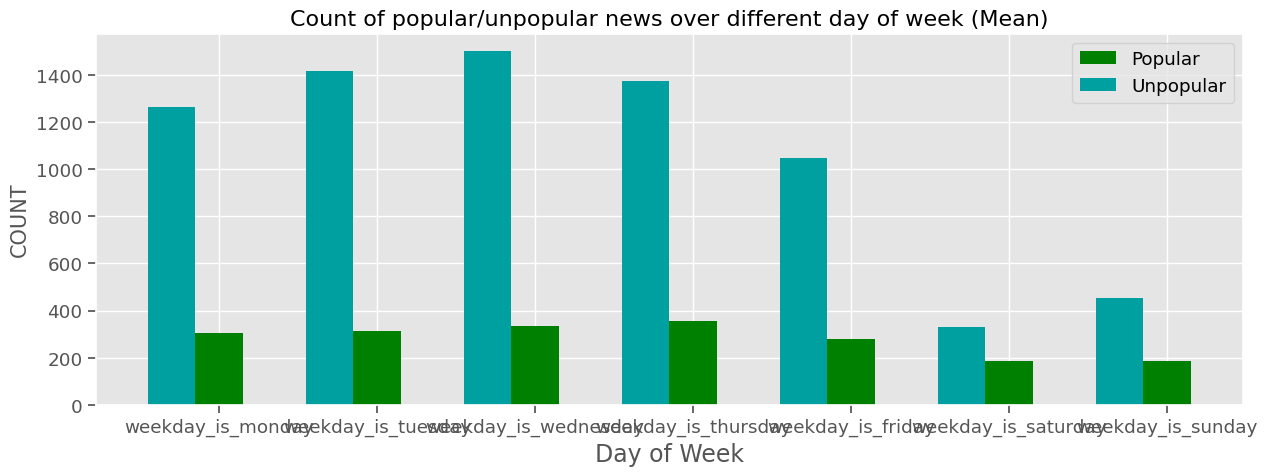

In [ ]:
Unpop=df[df['shares']<a]
Pop=df[df['shares']>=a]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [ ]:
Dc=df.columns[9:15]
Dc

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world'],
      dtype='object')

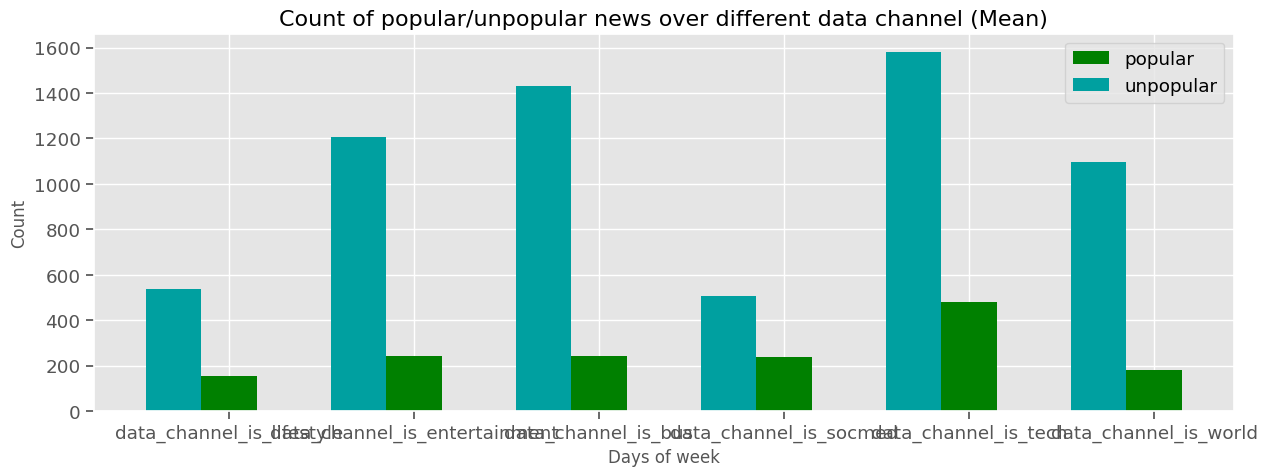

In [ ]:
Unpop3=df[df['shares']<a]
Pop3=df[df['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


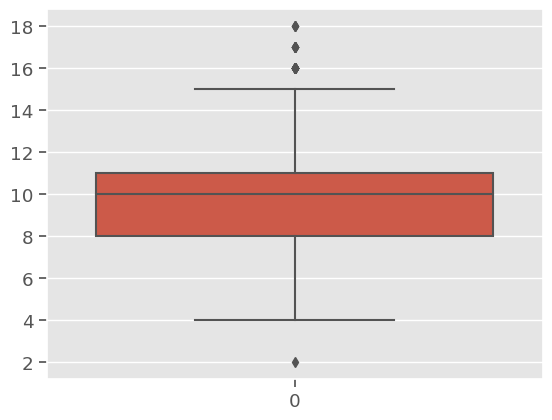

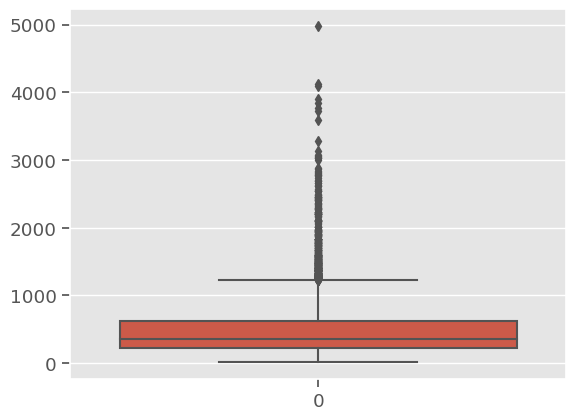

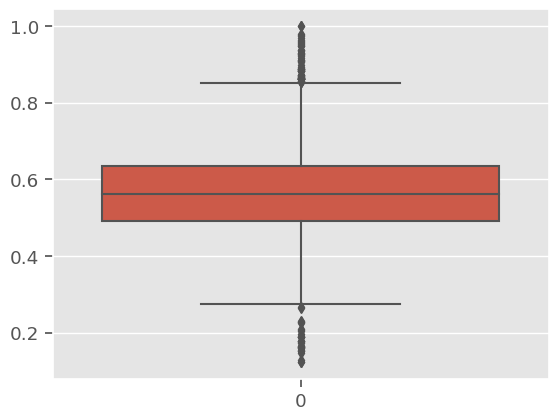

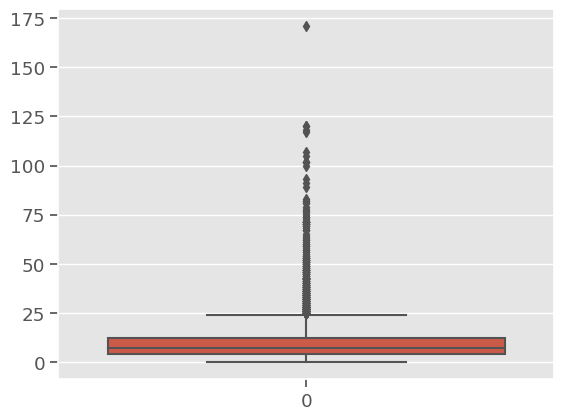

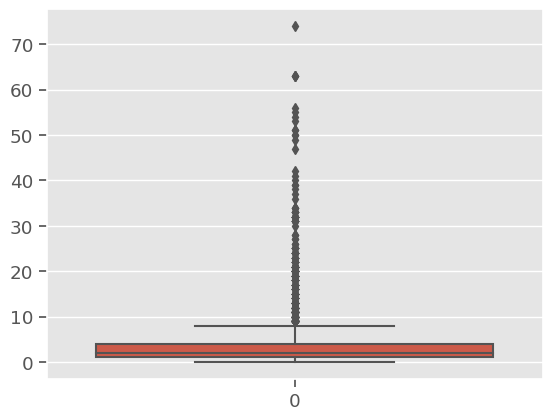

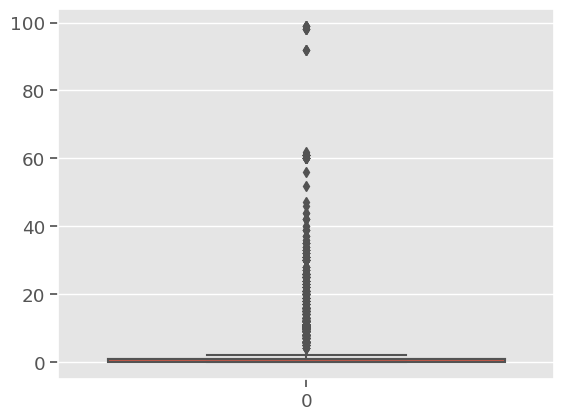

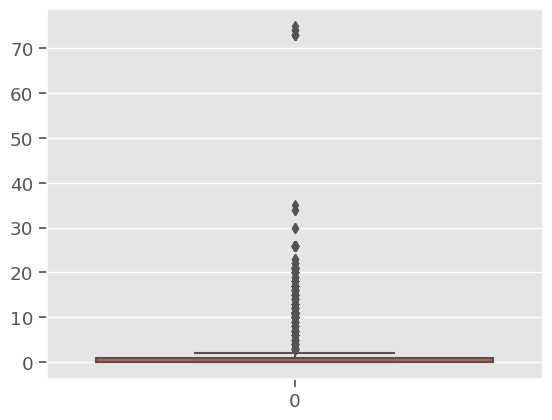

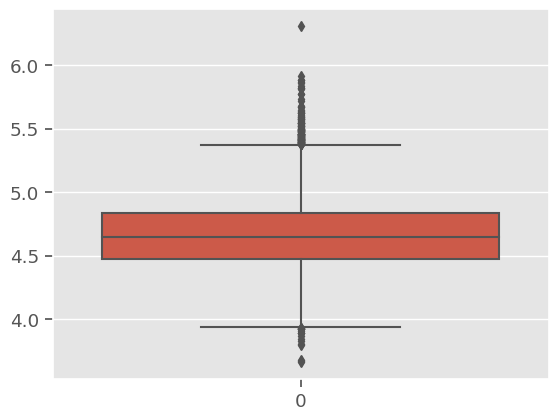

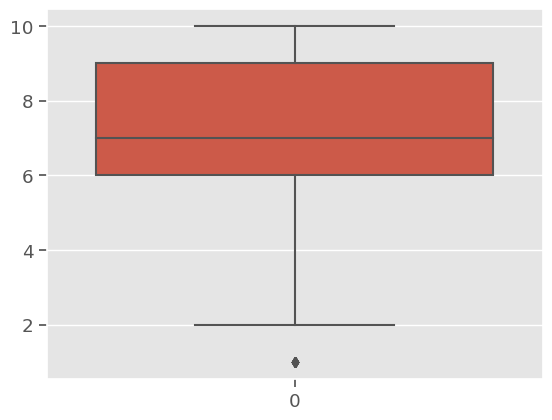

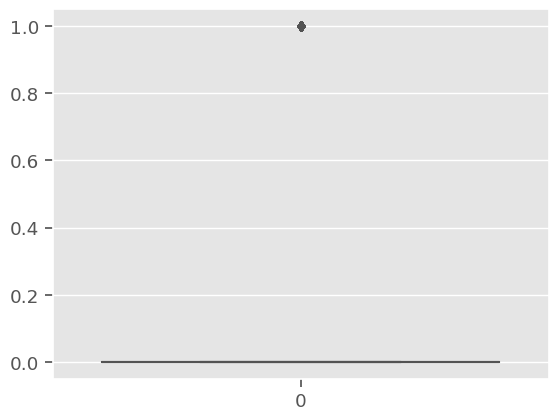

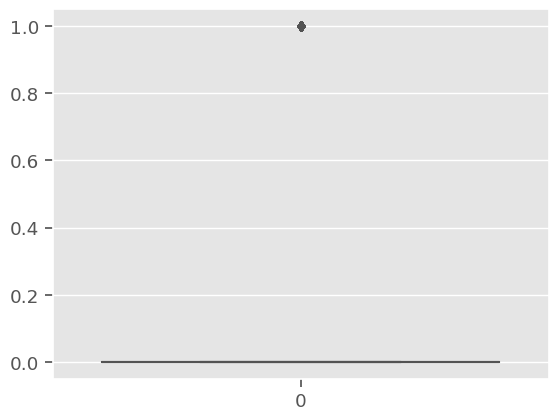

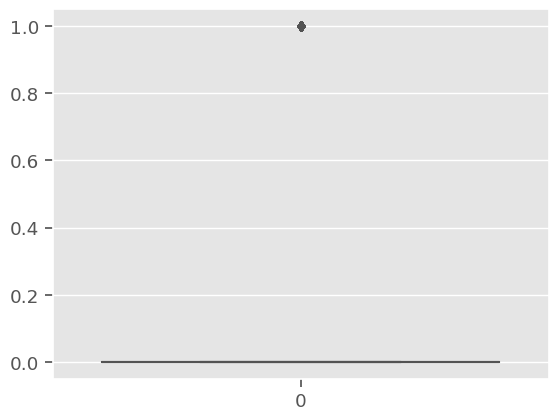

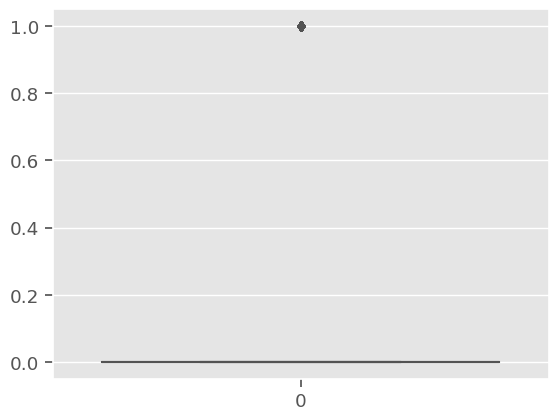

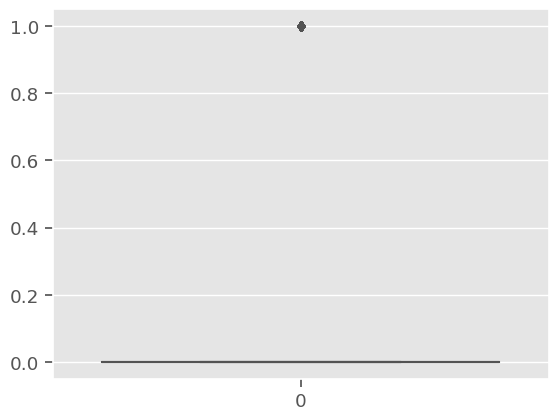

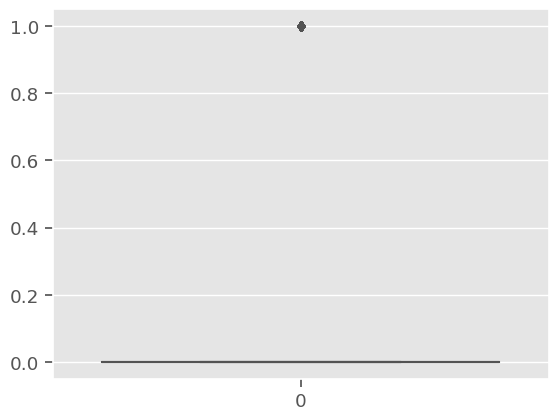

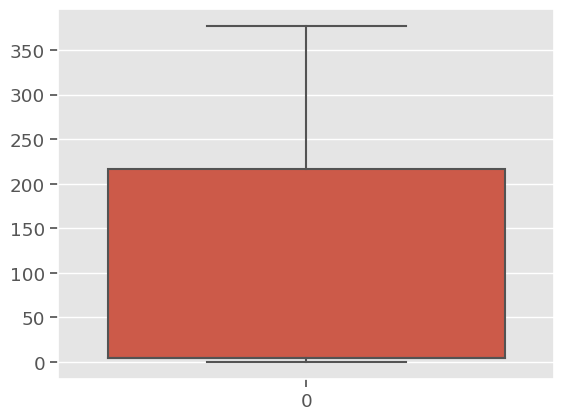

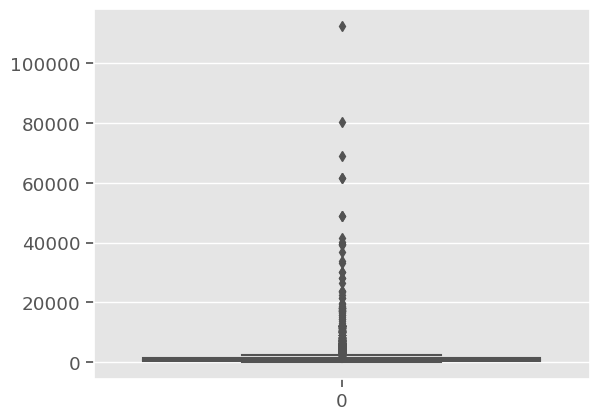

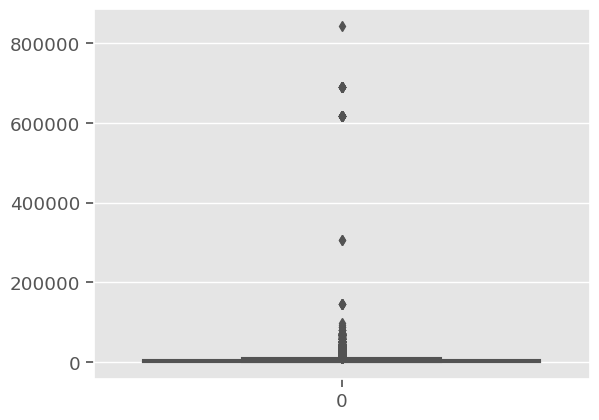

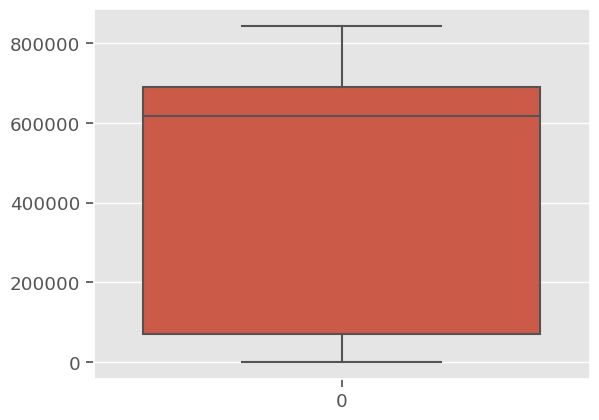

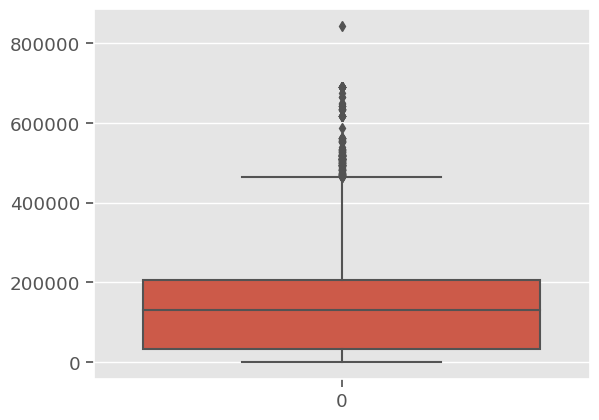

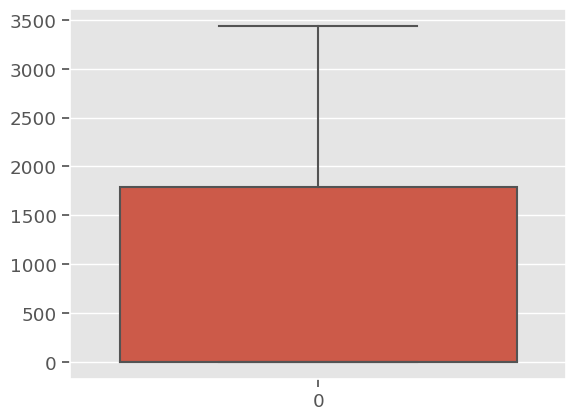

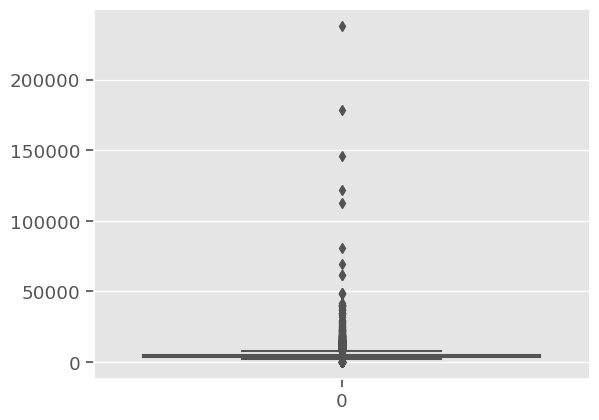

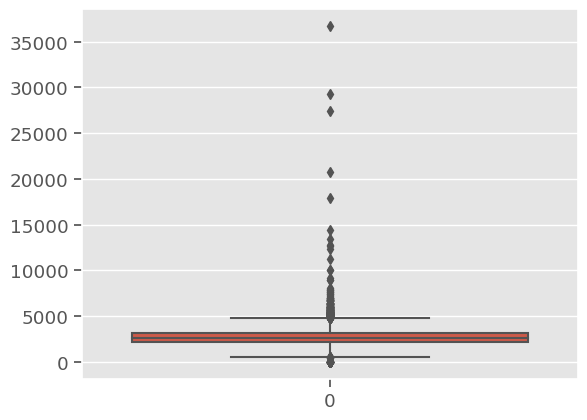

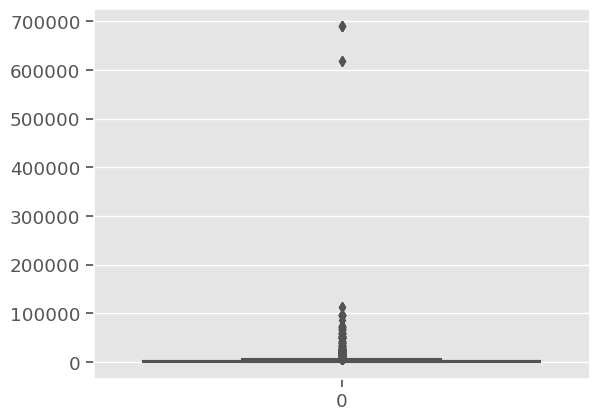

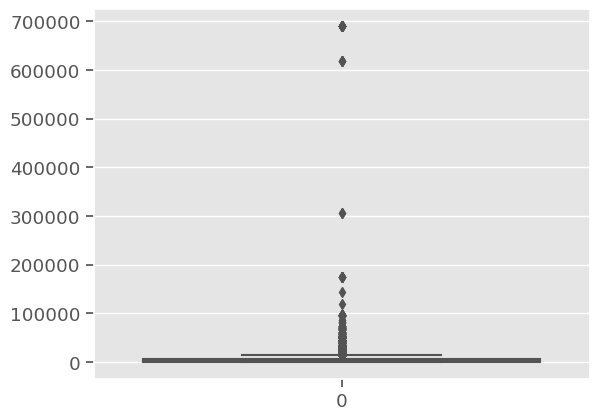

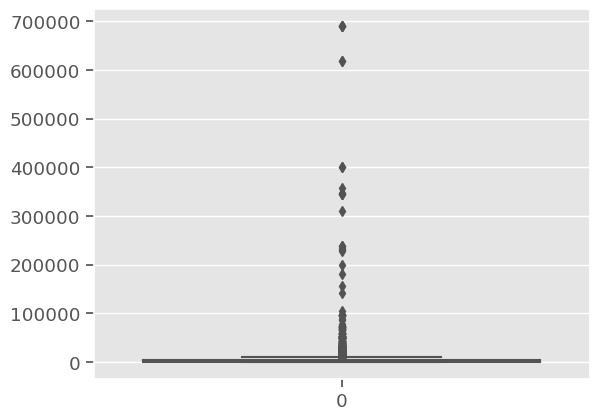

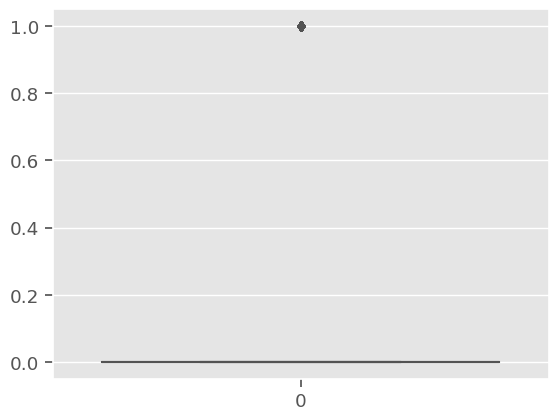

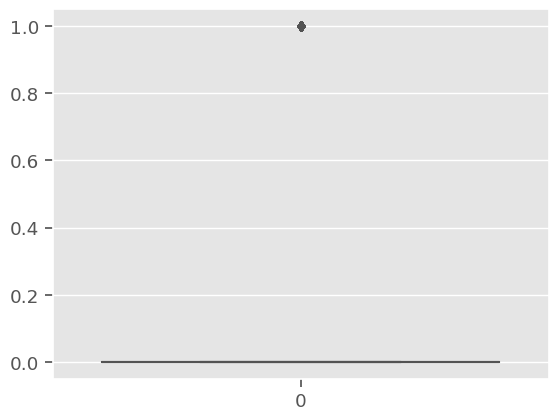

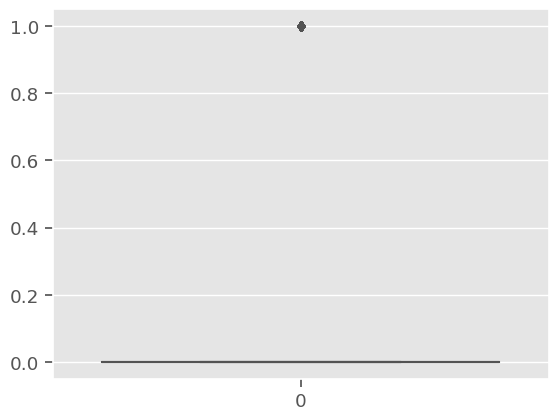

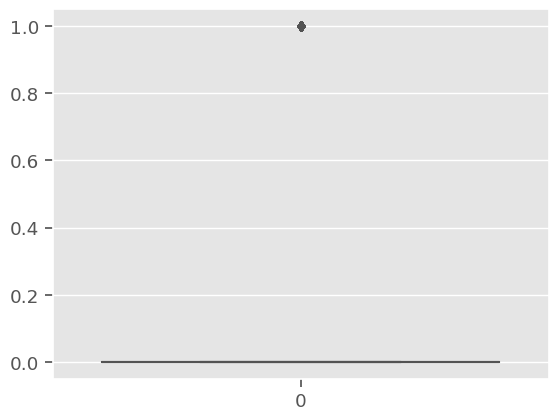

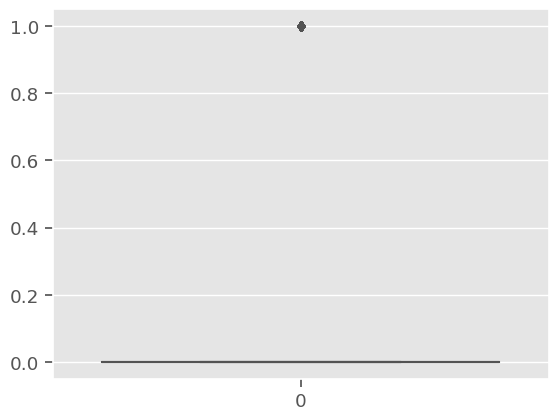

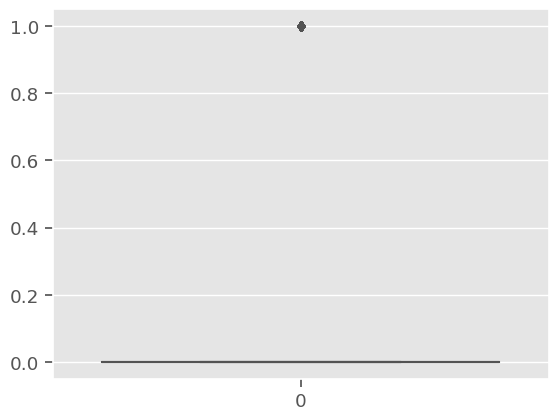

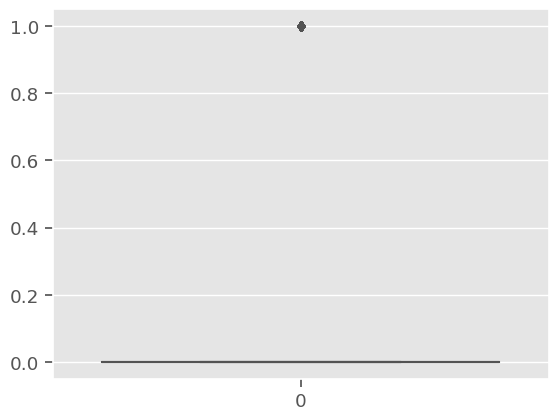

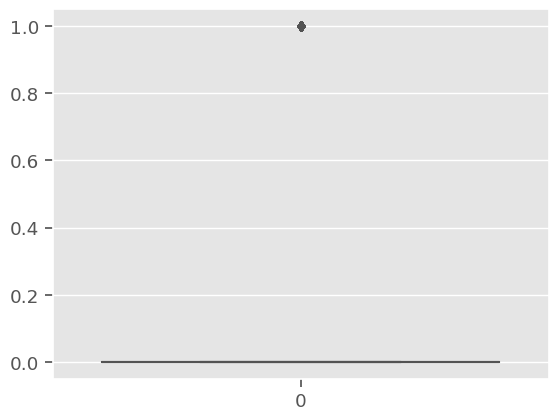

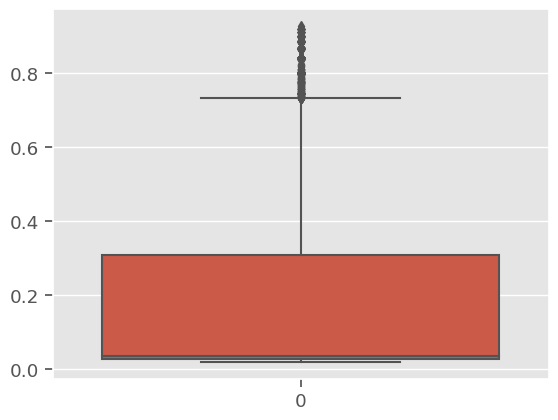

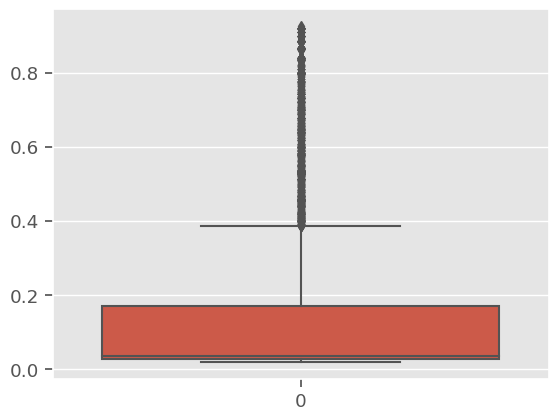

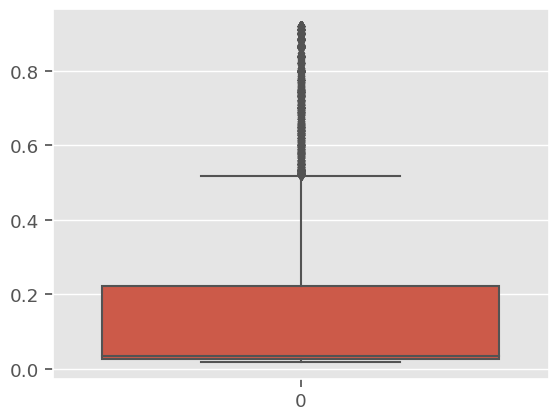

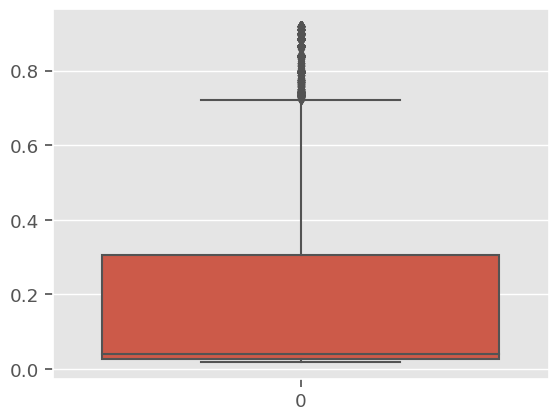

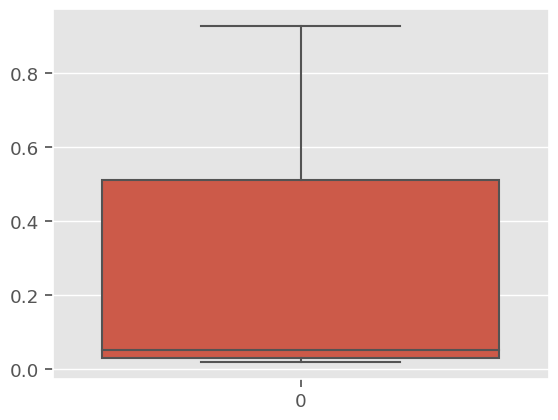

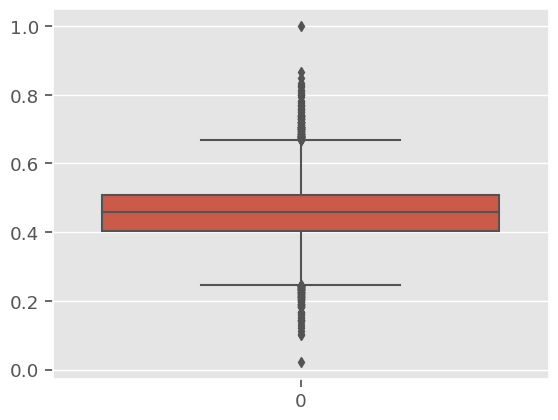

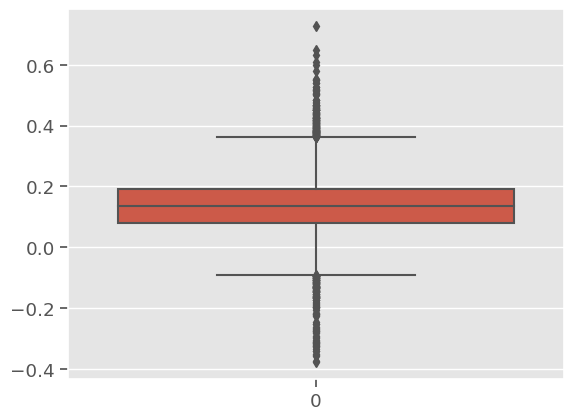

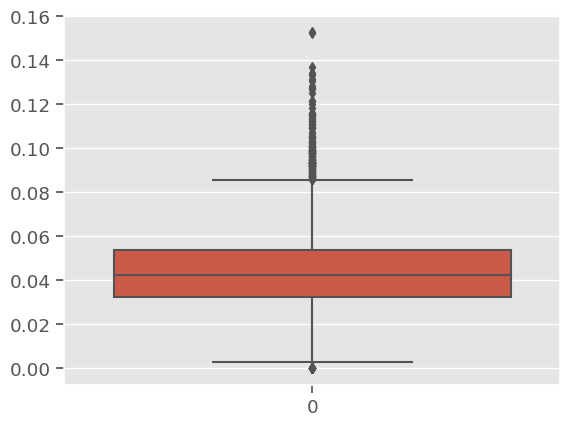

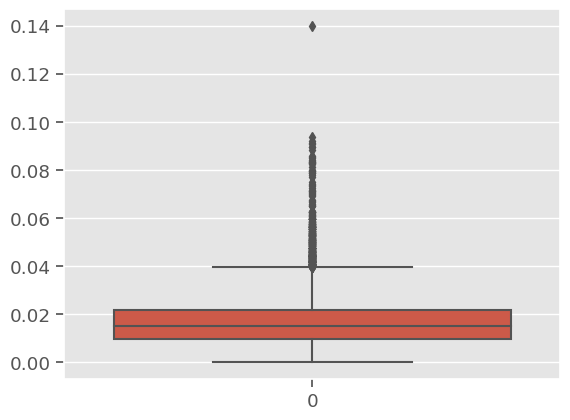

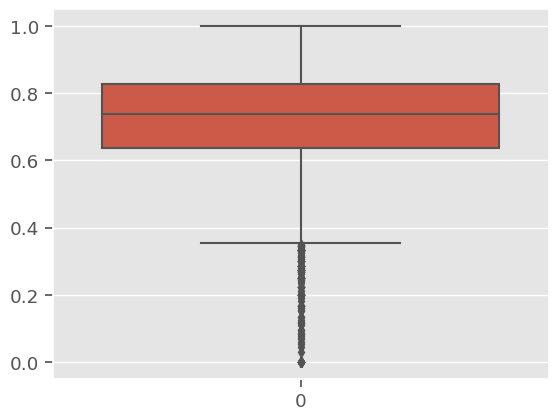

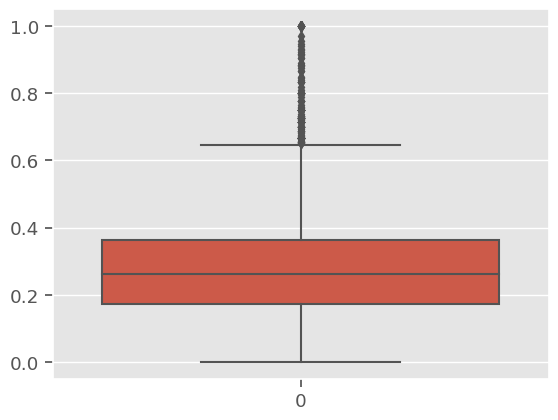

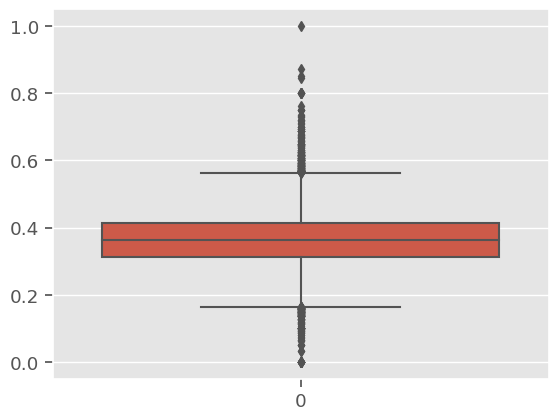

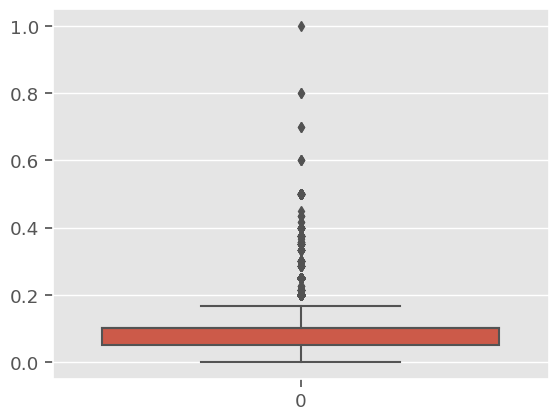

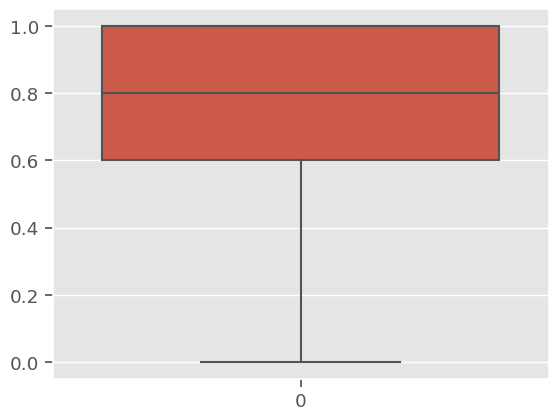

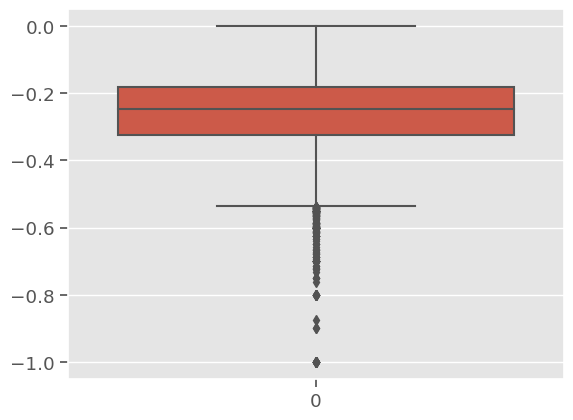

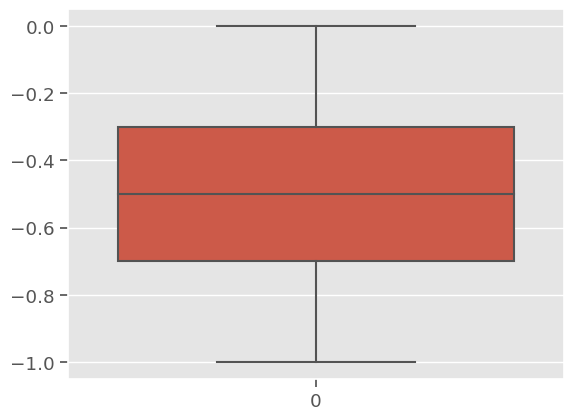

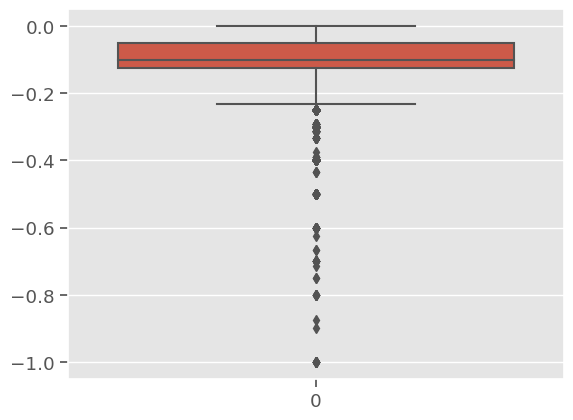

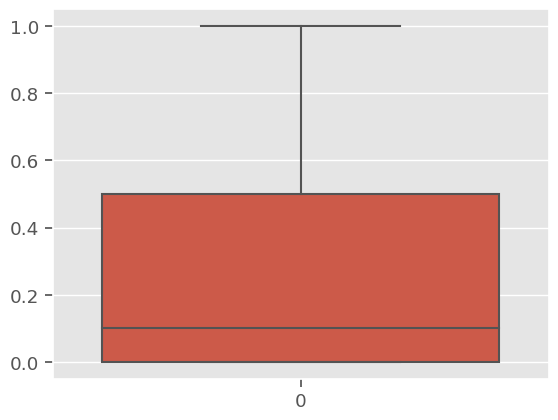

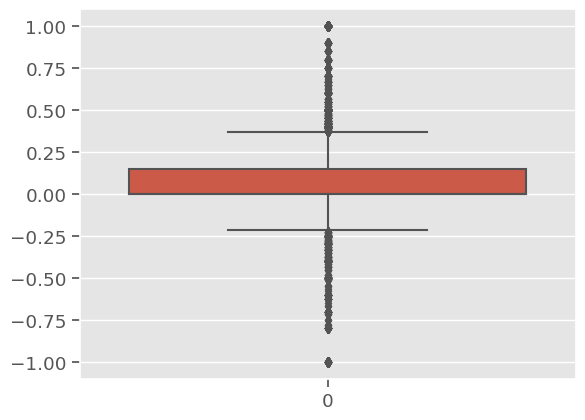

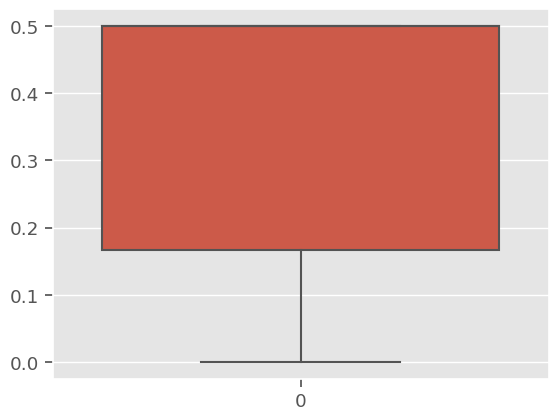

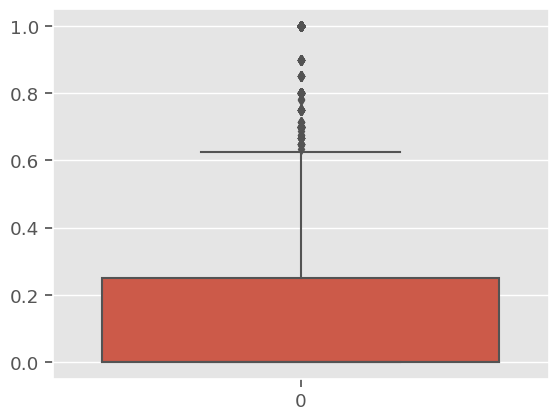

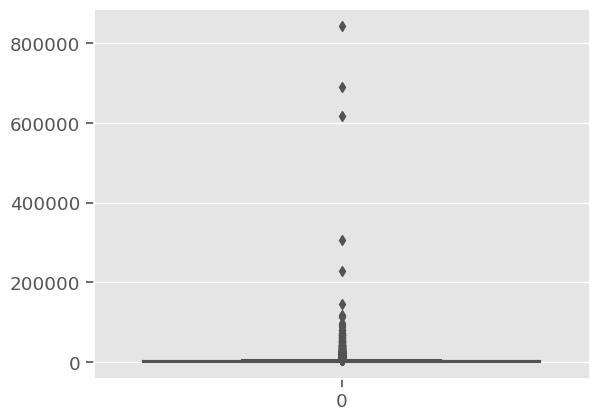

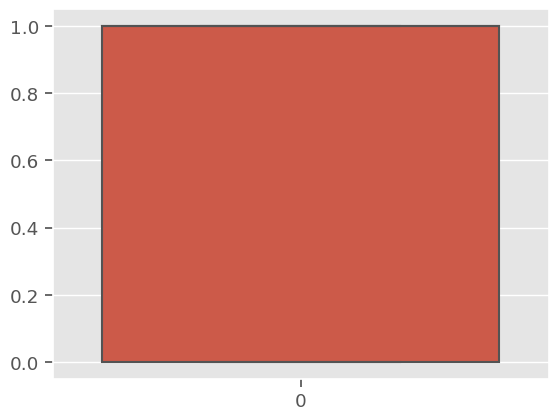

In [ ]:
num_cols = df.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df[num_cols[i]])
    plt.show()

In [ ]:
for column in num_cols:
    q1 = df[column].quantile(0.25)    # First Quartile
    q3 = df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < llimit) | (df[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 31
3.5
15.5
3.0
Number of outliers in "n_tokens_content" : 465
-377.625
1229.375
401.75
Number of outliers in "n_unique_tokens" : 102
0.273006636325
0.852794534125
0.14494697445
Number of outliers in "num_hrefs" : 629
-8.0
24.0
8.0
Number of outliers in "num_self_hrefs" : 524
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 1837
-1.5
2.5
1.0
Number of outliers in "num_videos" : 662
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 142
3.9347249063750014
5.373821827374998
0.3597742302499993
Number of outliers in "num_keywords" : 16
1.5
13.5
3.0
Number of outliers in "data_channel_is_lifestyle" : 687
0.0
0.0
0.0
Number of outliers in "data_channel_is_entertainment" : 1449
0.0
0.0
0.0
Number of outliers in "data_channel_is_bus" : 1673
0.0
0.0
0.0
Number of outliers in "data_channel_is_socmed" : 744
0.0
0.0
0.0
Number of outliers in "data_channel_is_tech" : 2066
0.0
0.0
0.0
Number of outliers in "data_channel_is_world" : 1275
0.0
0.0
0.0
Nu

In [ ]:
# df2_num  dataframe contains numerical feaures.

df2_num=df.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

# df2_cat dataframe contains catagoricl features.

df2_cat=df[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

In [ ]:
# We will check distribution of attributes to decide the method of scaling

# Drop target variable from df2_num

df2_num = df2_num.drop('shares',axis=1)

In [ ]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity',
       'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [ ]:
# Finding negative values.

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'kw_min_min', 'kw_max_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess',
       'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity',
       'popularity'],
      dtype='object')

In [ ]:
#converting negative values to positive values for applying Box-Cox method and creating new feature.

for i in negcols:
    m=df2_num[i].min()
    name=i +'_new'
    df2_num[name]=((df2_num[i]+1)-m)

In [ ]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity',
       'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity', 'num_hrefs_new', 'num_self_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'kw_min_m

In [ ]:
# Droping old negative column

for i in negcols:
    df2_num.drop(i,axis=1,inplace=True)

In [ ]:
# Checking negative columns

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index([], dtype='object')

In [ ]:
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
df2_num_add=pt.fit_transform(df2_num)
df2_num_add=(pd.DataFrame(df2_num_add,columns=df2_num.columns))

In [ ]:
#Treating outlier :

for col in df2_num_add.columns:
    percentiles = df2_num_add[col].quantile([0.01,0.99]).values
    df2_num_add[col][df2_num_add[col] <= percentiles[0]] = percentiles[0]
    df2_num_add[col][df2_num_add[col] >= percentiles[1]] = percentiles[1]

In [ ]:
# Checking outliers again

num_cols = df2_num_add.select_dtypes(['int64','float64']).columns

for column in num_cols:
    q1 = df2_num_add[column].quantile(0.25)    # First Quartile
    q3 = df2_num_add[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df2_num_add[(df2_num_add[column] < llimit) | (df2_num_add[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 0
2.411313591021854
8.681988788041918
1.5676687992550162
Number of outliers in "n_tokens_content" : 0
3.8024477933797747
7.57746266437144
0.9437537177479163
Number of outliers in "n_unique_tokens" : 0
-0.7791595399998623
-0.13781689235393066
0.1603356619114829
Number of outliers in "average_token_length" : 0
0.7292588373216078
0.7902551356119853
0.01524907457259439
Number of outliers in "num_keywords" : 0
0.43514801043610607
12.905473155944257
3.117581286377038
Number of outliers in "LDA_00" : 0
-22.916994215246156
11.216489527771381
8.533370935754384
Number of outliers in "LDA_01" : 0
-42.690916166028416
19.716941594515887
15.601964440136076
Number of outliers in "LDA_02" : 0
-29.858546670519914
14.030600879076012
10.972286887398981
Number of outliers in "LDA_03" : 0
-23.342444229716502
11.417787268336093
8.69005787451315
Number of outliers in "LDA_04" : 0
-12.459111156969442
6.316561678087037
4.69391820876412
Number of outliers in "global_subj

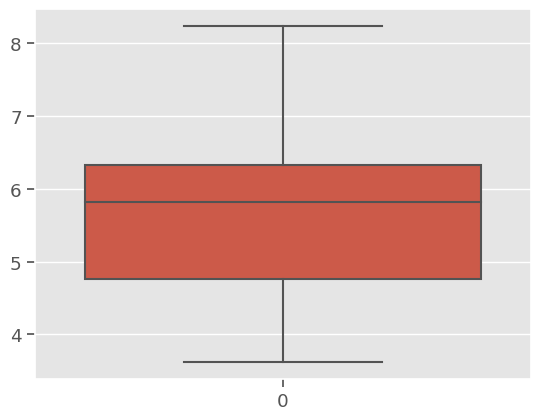

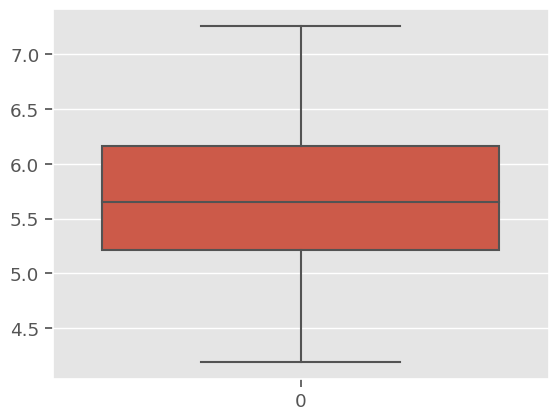

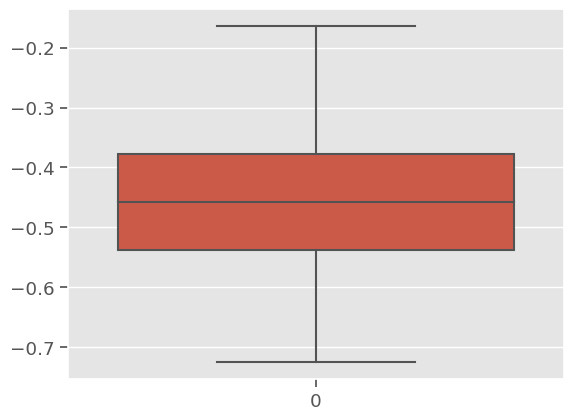

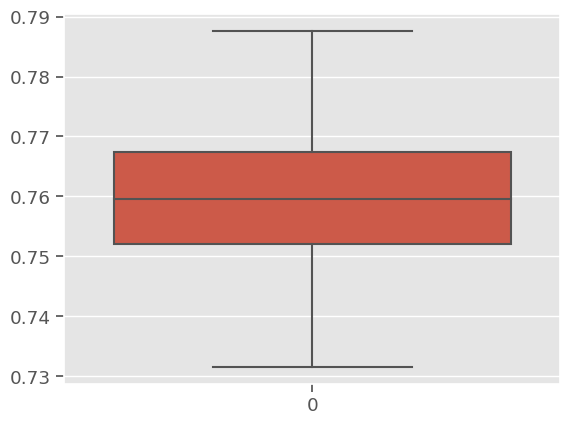

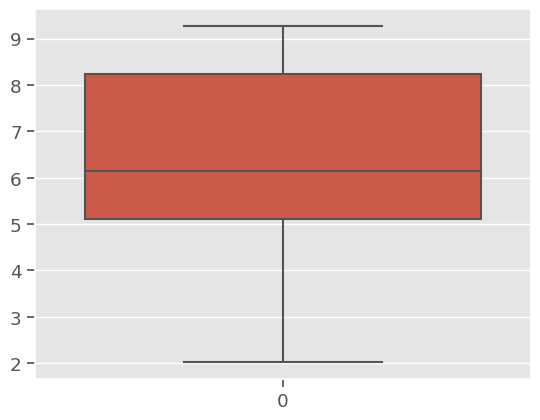

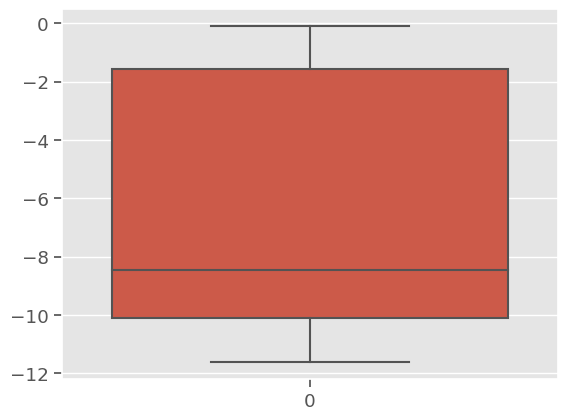

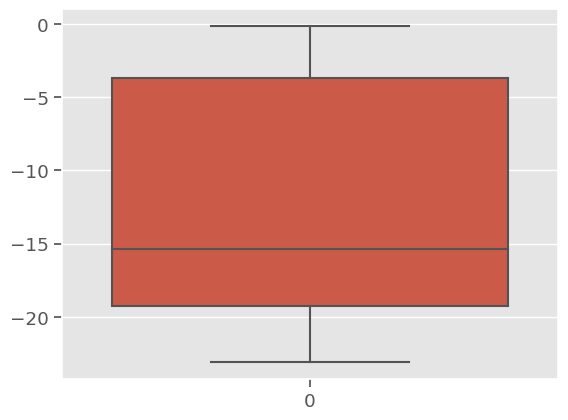

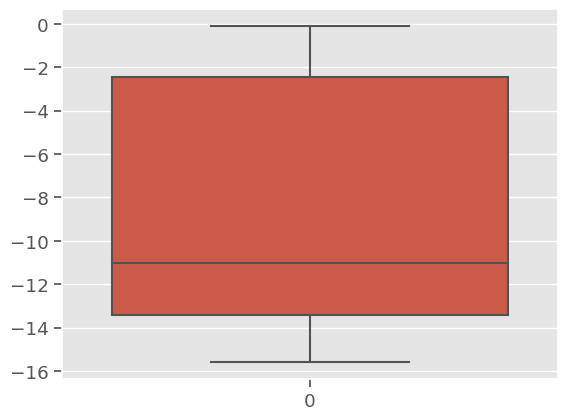

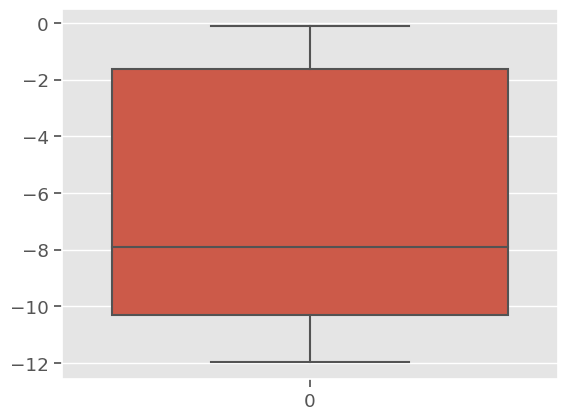

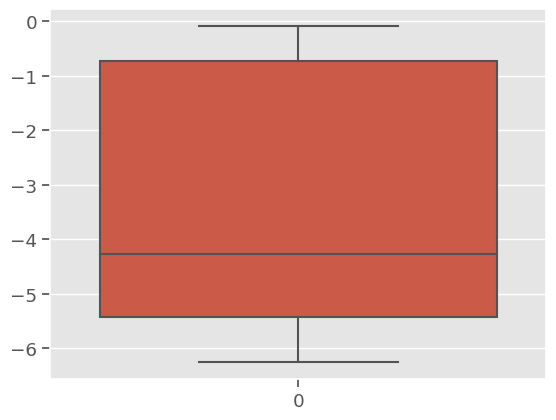

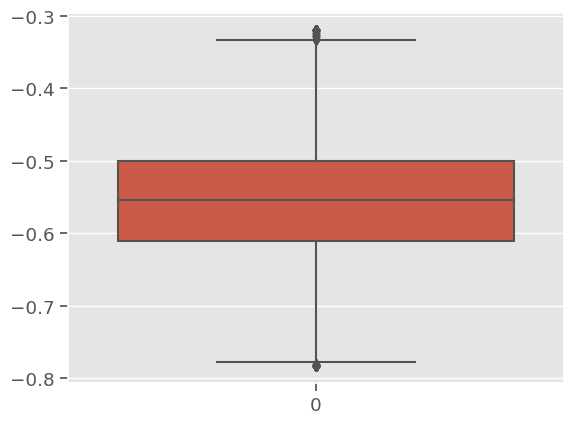

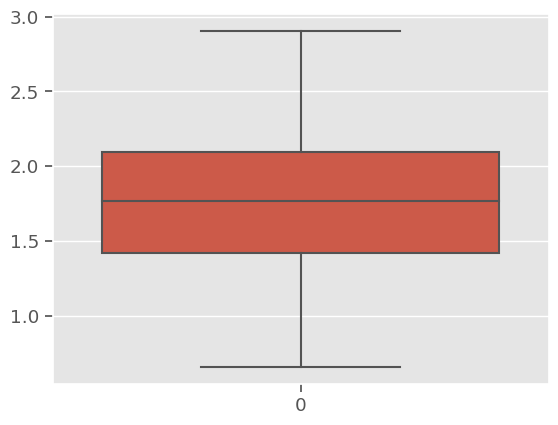

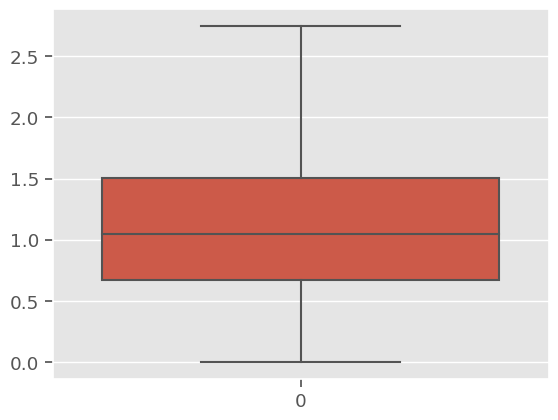

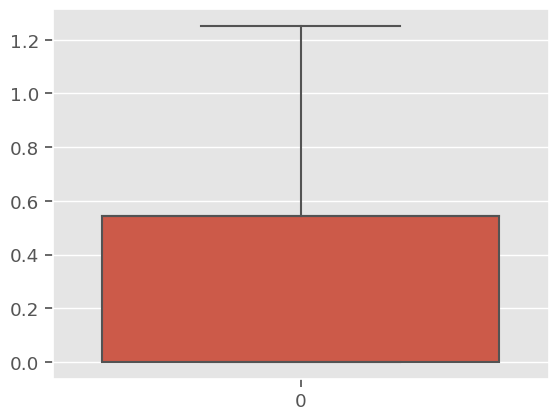

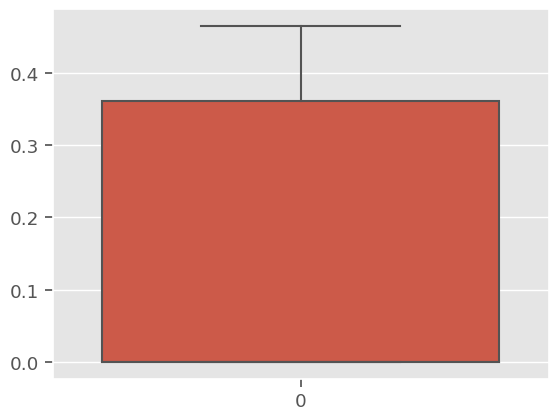

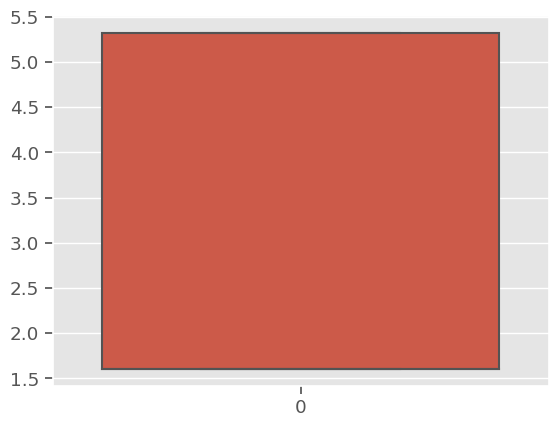

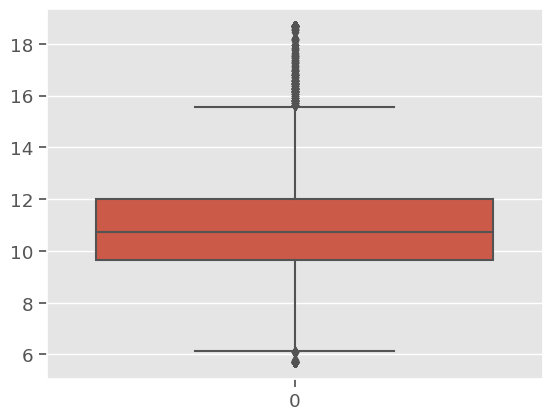

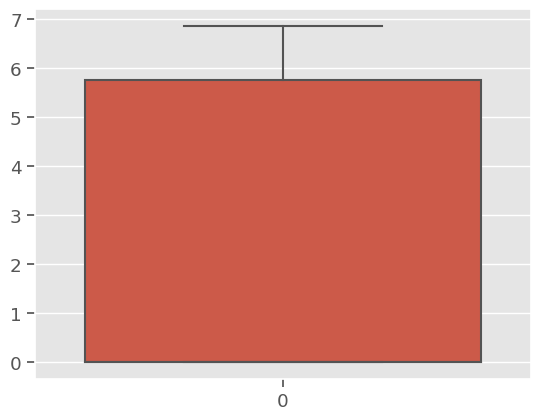

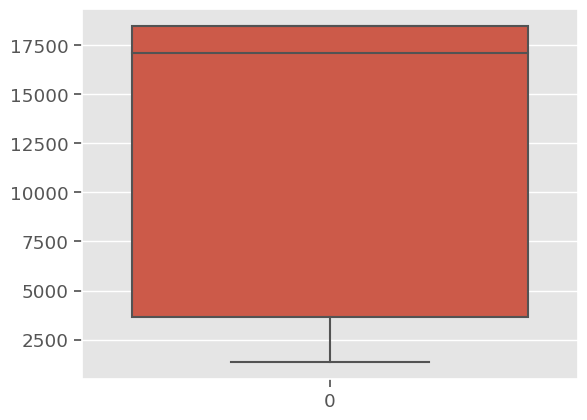

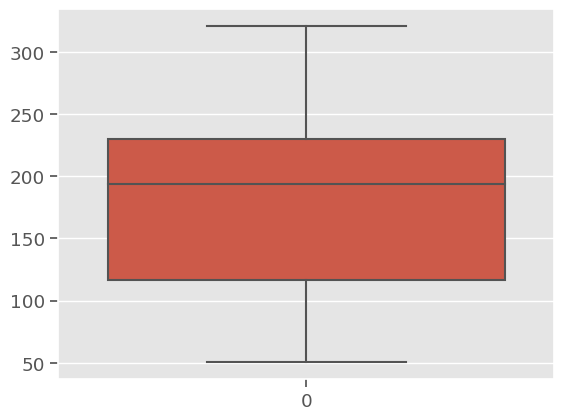

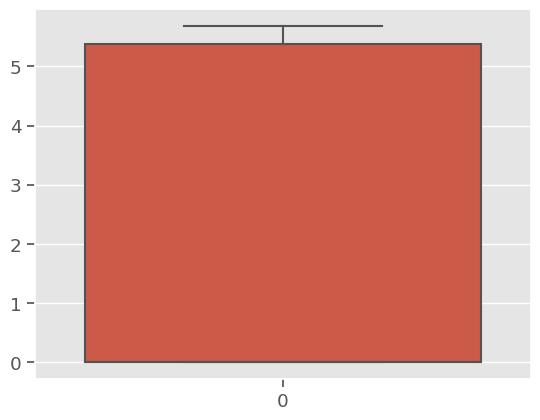

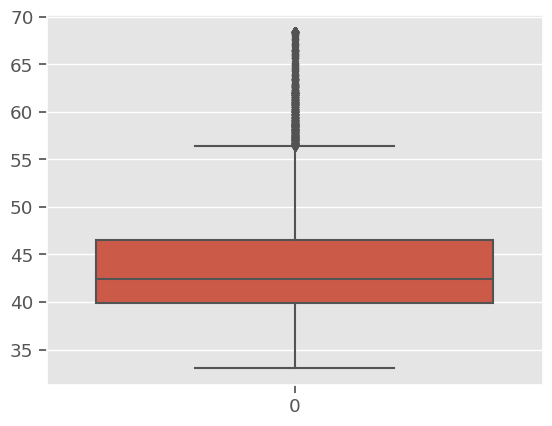

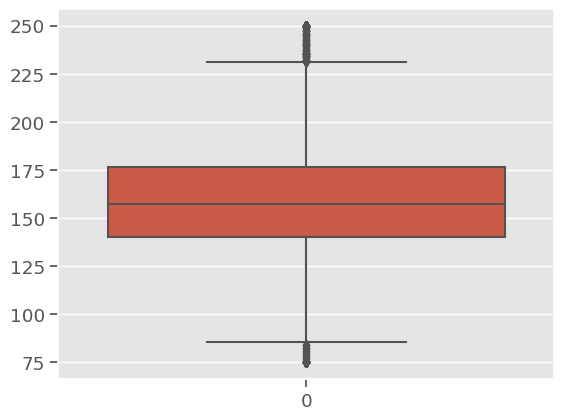

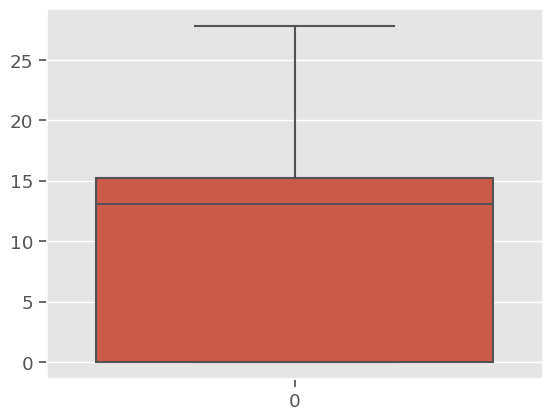

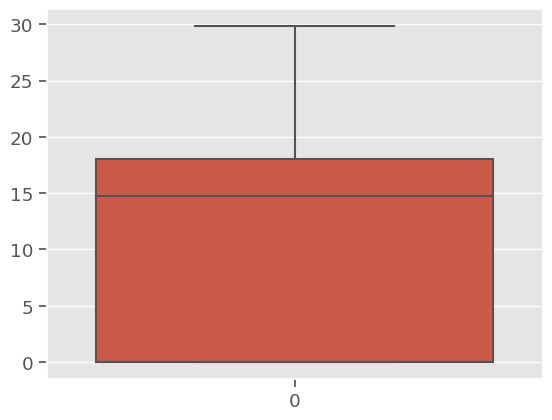

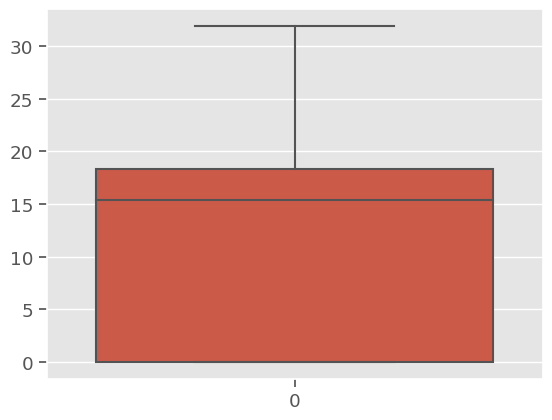

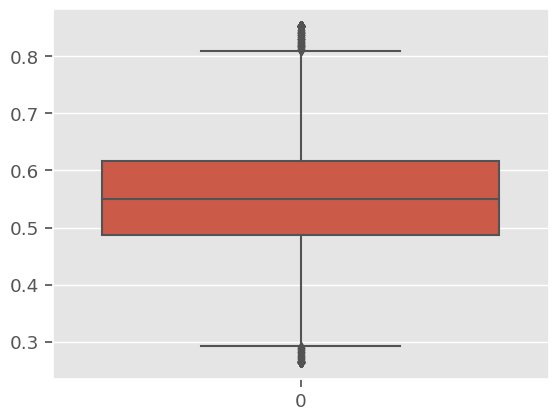

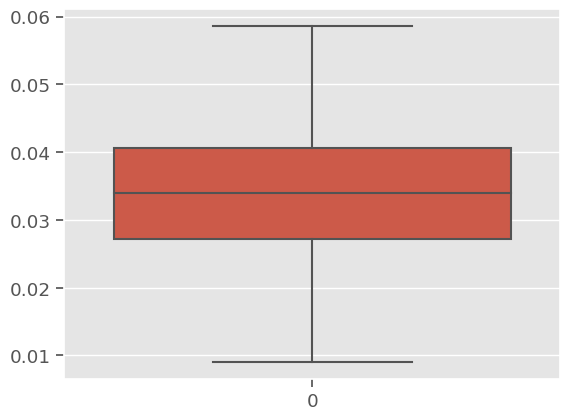

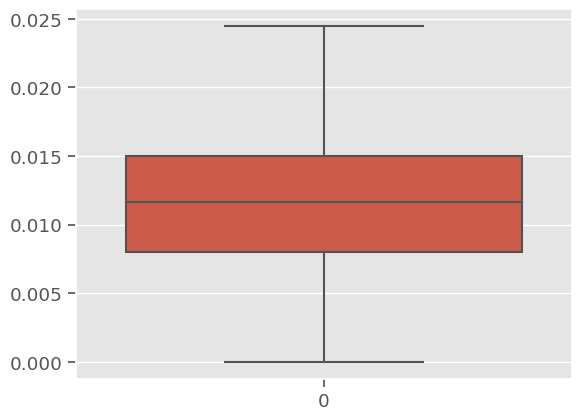

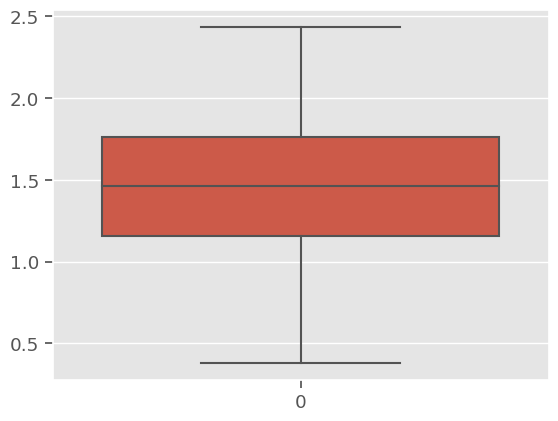

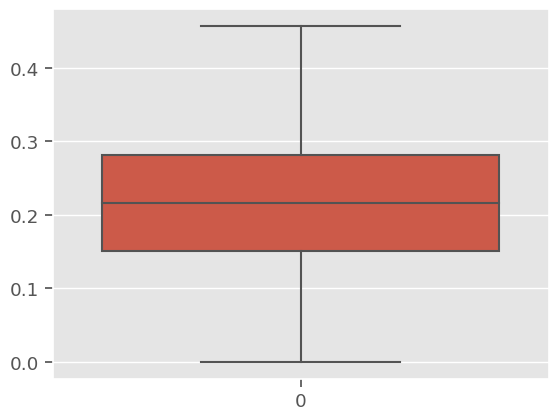

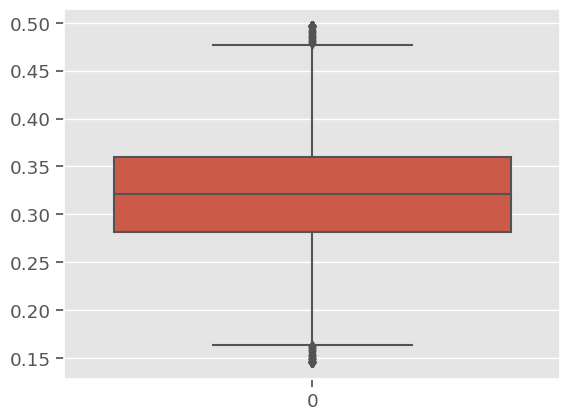

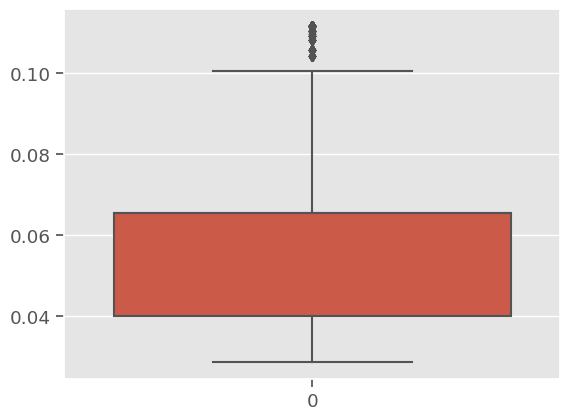

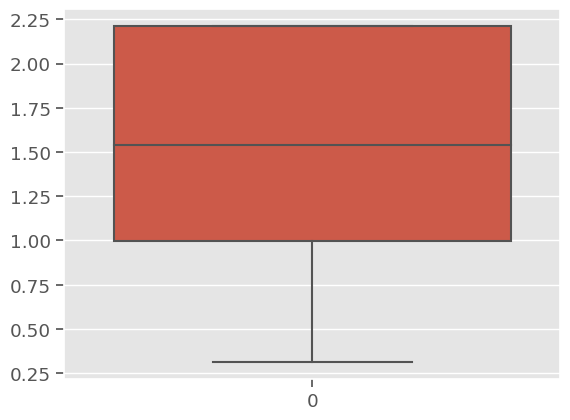

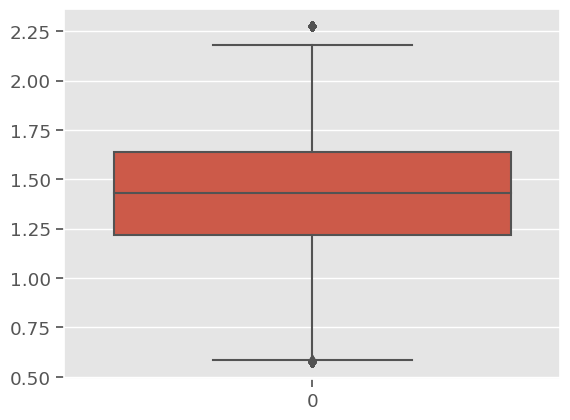

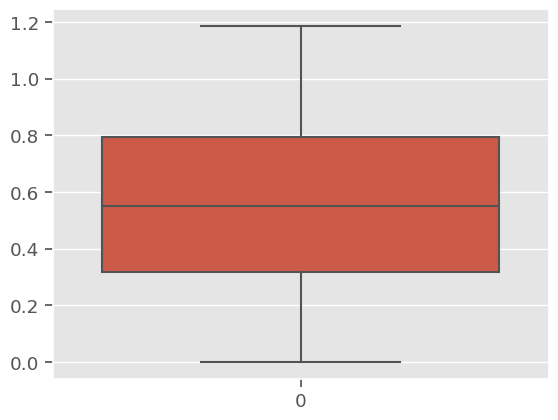

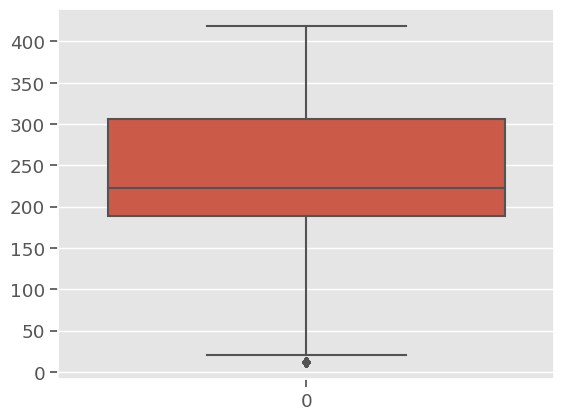

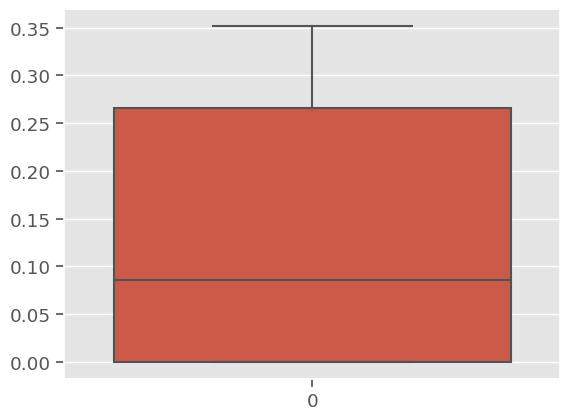

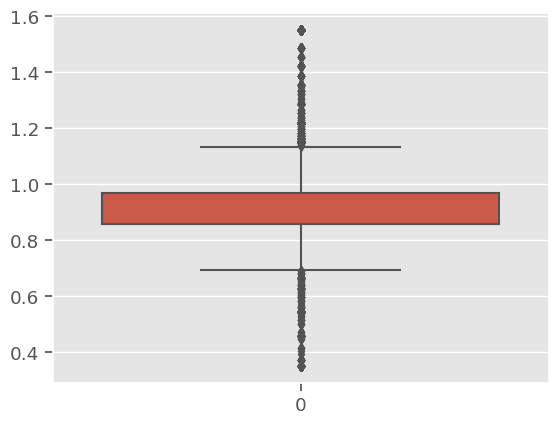

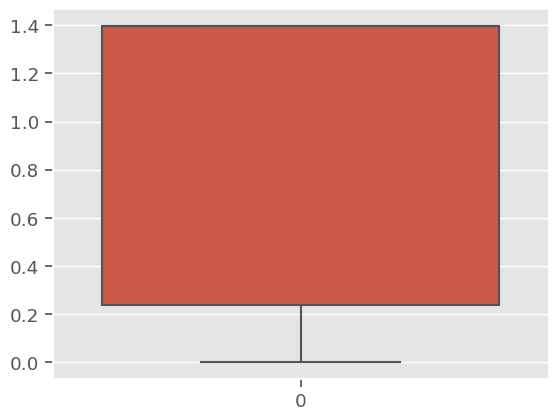

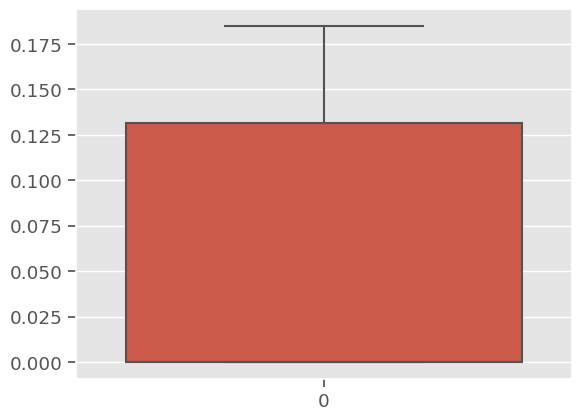

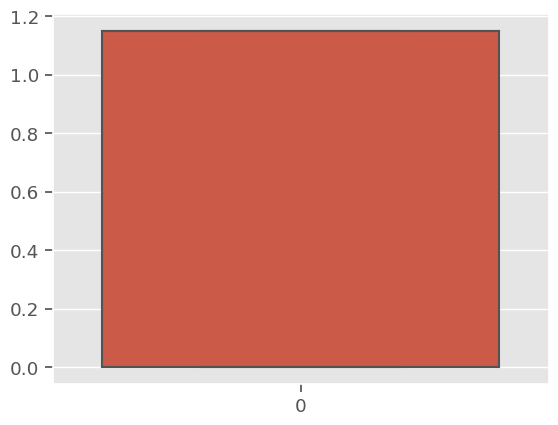

In [ ]:
num_cols = df2_num_add.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df2_num_add[num_cols[i]])
    plt.show()

In [ ]:
df2_num_add.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'average_token_length',
       'num_keywords', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'num_hrefs_new', 'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new', 'kw_min_min_new',
       'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new', 'kw_avg_max_new', 'kw_min_avg_new',
       'kw_max_avg_new', 'kw_avg_avg_new', 'self_reference_min_shares_new',
       'self_reference_max_shares_new', 'self_reference_avg_sharess_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new', 'rate_negative_words_new',
       'avg_positive_polarity_new', 'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_subjectivity_new', 'title_sentiment_polarity_new', 'abs_title_subjectivity_new',
       'abs_title_s

In [ ]:
# Combining numeric features and catogorical features.

df_final=pd.concat([df2_num_add,df2_cat],axis=1)

In [ ]:
df_final.shape

(9420, 56)

In [ ]:
df_final['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

In [ ]:
df_final.isnull().sum()

n_tokens_title                      74
n_tokens_content                    74
n_unique_tokens                     74
average_token_length                74
num_keywords                        74
LDA_00                              74
LDA_01                              74
LDA_02                              74
LDA_03                              74
LDA_04                              74
global_subjectivity                 74
num_hrefs_new                       74
num_self_hrefs_new                  74
num_imgs_new                        74
num_videos_new                      74
kw_min_min_new                      74
kw_max_min_new                      74
kw_min_max_new                      74
kw_max_max_new                      74
kw_avg_max_new                      74
kw_min_avg_new                      74
kw_max_avg_new                      74
kw_avg_avg_new                      74
self_reference_min_shares_new       74
self_reference_max_shares_new       74
self_reference_avg_shares

In [ ]:
df_final=df_final.dropna()

In [ ]:
df_final.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'average_token_length',
       'num_keywords', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'num_hrefs_new', 'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new', 'kw_min_min_new',
       'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new', 'kw_avg_max_new', 'kw_min_avg_new',
       'kw_max_avg_new', 'kw_avg_avg_new', 'self_reference_min_shares_new',
       'self_reference_max_shares_new', 'self_reference_avg_sharess_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new', 'rate_negative_words_new',
       'avg_positive_polarity_new', 'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_subjectivity_new', 'title_sentiment_polarity_new', 'abs_title_subjectivity_new',
       'abs_title_s

In [ ]:
modelscore=[]
X=df_final.drop(['popularity','popularity_new'],axis=1)
y=df_final['popularity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.patches as mpatches
def evaluate(results,name):
    """
    Visualization code to display results of various learners.

    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
    results = {}

    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time

    results['train_time'] = end-start

    # Get predictions on the first 4000 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:4000])
    end = time() # Get end time

    # Calculate the total prediction time
    results['pred_time'] = end-start
    # Compute accuracy on the first 4000 training samples
    results['acc_train'] = accuracy_score(y_train[:4000],predictions_train)

    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)

    # Compute F-score on the the first 4000 training samples
    results['f_train'] = fbeta_score(y_train[:4000],predictions_train,beta=1)
        # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)

    # Compute AUC on the the first 4000 training samples
    results['auc_train'] = roc_auc_score(y_train[:4000],predictions_train)

    # Compute AUC on the test set
    results['auc_test'] = roc_auc_score(y_test,predictions_test)

    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print ("{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test']) )
    # Return the results
    #cm=confusion_matrix(y_test,predictions_test)
    #df_cm = pd.DataFrame(cm, range(2), range(2))
    # plt.figure(figsize=(10,7))
    #sns.set(font_scale=1.4) # for label size
    #sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

    #plt.show()
    return results

In [ ]:
import matplotlib.patches as mpatches
def evaluate(results,name):
    """
    Visualization code to display results of various learners.

    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
     # Create figure
    fig, ax = plt.subplots(2, 4, figsize = (16,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'auc_train','pred_time', 'acc_test',\
                                    'f_test', 'auc_test']):
            for i in np.arange(3):

                # Creative plot code
                ax[j//4, j%4].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//4, j%4].set_xticks([0.45, 1.45, 2.45])
                ax[j//4, j%4].set_xticklabels(["1%", "10%", "100%"])
                ax[j//4, j%4].set_xlim((-0.1, 3.0))


      # Add labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[0, 3].set_ylabel("AUC")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    ax[1, 3].set_ylabel("AUC")
    ax[1, 0].set_xlabel("Training Set Size")
    ax[1, 1].set_xlabel("Training Set Size")
    ax[1, 2].set_xlabel("Training Set Size")
    ax[1, 3].set_xlabel("Training Set Size")

    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[0, 3].set_title("AUC on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    ax[1, 3].set_title("AUC on Testing Subset")

     # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[0, 3].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    ax[1, 3].set_ylim((0, 1))
    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches,  bbox_to_anchor = (-1.4, 2.54),\
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
     # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.savefig(name)
    plt.tight_layout()
    plt.show()


In [ ]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    results = {}
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time

    results['train_time'] = end-start

    # Get predictions on the first 4000 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:4000])
    end = time() # Get end time

    # Calculate the total prediction time
    results['pred_time'] = end-start
    # Compute accuracy on the first 4000 training samples
    results['acc_train'] = accuracy_score(y_train[:4000],predictions_train)

    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)

    # Compute F-score on the the first 4000 training samples
    results['f_train'] = fbeta_score(y_train[:4000],predictions_train,beta=1)
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)

    # Compute AUC on the the first 4000 training samples
    results['auc_train'] = roc_auc_score(y_train[:4000],predictions_train)

    # Compute AUC on the test set
    results['auc_test'] = roc_auc_score(y_test,predictions_test)
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print ("{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test']) )
    # Return the results
    #cm=confusion_matrix(y_test,predictions_test)
    #df_cm = pd.DataFrame(cm, range(2), range(2))
    # plt.figure(figsize=(10,7))
    #sns.set(font_scale=1.4) # for label size
    #sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

    #plt.show()
    return results

In [ ]:
# Import the three supervised learning models from sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from time import time
from IPython.display import display
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score

AdaBoostClassifier trained on 74 samples.
AdaBoostClassifier with accuracy 0.5266846361185984, F1 0.6298482293423271 and AUC 0.4971635799393569.
AdaBoostClassifier trained on 741 samples.
AdaBoostClassifier with accuracy 0.5660377358490566, F1 0.6528676153514447 and AUC 0.5414578795773011.
AdaBoostClassifier trained on 7416 samples.
AdaBoostClassifier with accuracy 0.6053908355795148, F1 0.6866438356164384 and AUC 0.5802922781993063.
LogisticRegression trained on 74 samples.
LogisticRegression with accuracy 0.5363881401617251, F1 0.6509740259740261 and AUC 0.499890268149055.
LogisticRegression trained on 741 samples.
LogisticRegression with accuracy 0.5579514824797843, F1 0.6985294117647058 and AUC 0.5019283148509308.
LogisticRegression trained on 7416 samples.
LogisticRegression with accuracy 0.5692722371967655, F1 0.7245777318166149 and AUC 0.49936355526451903.
RandomForestClassifier trained on 74 samples.
RandomForestClassifier with accuracy 0.5439353099730458, F1 0.6873614190687362

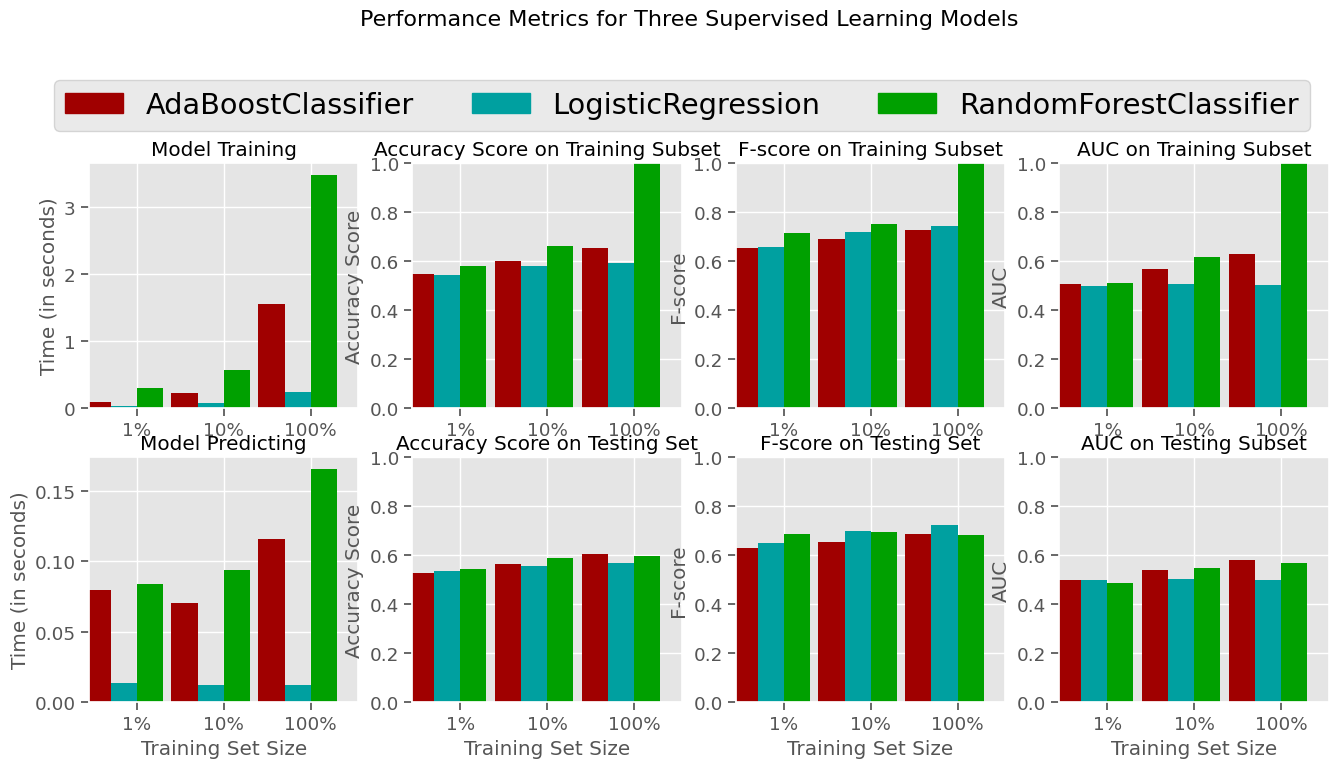

In [ ]:
# Initialize the three models
clf_A = AdaBoostClassifier(random_state=0)
clf_B = LogisticRegression(random_state=0,C=1.0)
clf_C = RandomForestClassifier(random_state=0)
# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
evaluate(results,'perf_unopt.pdf')
